## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [1]:

##from google.colab import drive
##drive.mount('/content/drive')

In [2]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
##%cd drive/MyDrive/CSE519

# Download data from Kaggle

In [3]:
##!pip install -q kaggle

In [4]:
##from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
##files.upload()

In [5]:
##! mkdir ~/.kaggle

In [6]:
##! cp kaggle.json ~/.kaggle/

In [7]:
##!kaggle competitions download -c commonlit-evaluate-student-summaries

# Alternate: download data using gdown (if having issues with Kaggle)

In [8]:
##!pip install gdown

In [9]:
##import gdown
##url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
##gdown.download(url)

# Extract data and install packages (regardless of data acquisition method)

In [10]:
##!unzip commonlit-evaluate-student-summaries.zip

In [11]:
### TODO: Install required packages
### Student's code here
# !pip install pandas
# !pip install scikit-learn
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install textstat

### END

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 4.5 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/12.8 MB 6.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.4/12.8 MB 9.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.8 MB 11.2 MB/s eta 0:00:01
     --------- ------------------------------ 2.9/12.8 MB 11.1 MB/s eta 0:00:01
     ----------- ---------------------------- 3.8/12.8 MB 12.2 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.8 MB 12.4 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.8 MB 13.7 MB/s eta 0:00:01
     ------------------- -------------------- 6.1/12.8 MB 13.4 MB/s eta 0:00:01
     --------------------- ------------------ 6.9/12.8 MB 14.2 MB/s eta 0:00:01
     ------------------------- -------------- 8.0/12

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [12]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

###

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kulka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kulka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kulka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [14]:
df1=pd.read_csv("Dataset/prompts_train.csv")
df2=pd.read_csv("Dataset/summaries_train.csv")

df1.isna().any()
df2.isna().any()

merge_df= pd.merge(df2,df1,on='prompt_id')

merge_df.head()
merge_df.isna().any()


merge_df.astype(dtypes)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       7165 non-null   object 
 1   prompt_id        7165 non-null   object 
 2   text             7165 non-null   object 
 3   content          7165 non-null   float64
 4   wording          7165 non-null   float64
 5   prompt_question  7165 non-null   object 
 6   prompt_title     7165 non-null   object 
 7   prompt_text      7165 non-null   object 
dtypes: float64(2), object(6)
memory usage: 447.9+ KB


## **Section 2: Features (Q2 and Q3, 25 points total)**

Q2 : Construct a table of five features (really 7) from the text for each instance: (10 points) 


        Number of words in student response (text) and prompt (prompt_text)
        Number of distinct words in student response (text) and prompt (prompt_text)
        Number of words common to student response (text) and prompt (prompt_text)
        Number of words common to student response (text) and prompt_question
        Number of words common to student response (text) and prompt_title


In [15]:
print(merge_df.query("prompt_id == '814d6b'").text[0])
print('\n')
print(merge_df.query("prompt_id == '814d6b'").prompt_question[0])
print('\n')

print(merge_df.query("prompt_id == '814d6b'").prompt_text[0])




The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader


Summarize how the Third Wave developed over such a short period of time and why the experiment was ended.


Background 
The Third Wave experiment took place at Cubberley High School in Palo Alto, California during the first week of April 1967. History teacher Ron Jones, finding himself unable to explain to his students how people throughout history followed the crowd even when terrible things were happening, decided to demonstrate it to his students through an experiment. Jones announced that he was starting a movement aimed to eliminate democracy. Jones named the movement “The Third Wave” as a symbol of strength, referring to the mythical bel

In [16]:
merge_df.head()

#Q2 and Q3 : Features derived from the text 

def lexical_diversity(text):
    
    words = text.split()
        
    types = len(set(words))
        
    tokens = len(words)
        
    ttr = types / tokens
    
    return ttr


import textstat
# Function for Flesch-Kincaid Grade Level
def calculate_fkgl(text):
    try:
        
        fkgl = textstat.flesch_kincaid_grade(text)
        return fkgl
    except Exception as e:
        
        print(f"Error calculating FKGL: {e}")
        return None


# Count the punctuations in the text.
# punctuation_set -> !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
def punct_count(text: str) -> int:
    punctuation_set = set(string.punctuation)
    punctuation_count = sum(1 for char in text if char in punctuation_set)
    return punctuation_count

# Count the digits in the text.
def digit_count(text: str) -> int:
    numbers = re.findall(r'\d+', text)
    numbers_count = len(numbers)
    return numbers_count

def stopword_count(text: str) -> int:
    stopword_list = set(stopwords.words('english'))
    words = text.split()
    stopwords_count = sum(1 for word in words if word.lower() in stopword_list)
    return stopwords_count

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Function to count distinct words in a text
def count_distinct_words(text):
    words = text.split()
    return len(set(words))

# Function to find common words between two texts
def count_common_words(text1, text2):
    fword = set(text1.split())
    sword = set(text2.split())
    common_words = fword.intersection(sword)
    return len(common_words)




## add number of sentences in text (as sent_count)
from nltk.tokenize import sent_tokenize

def get_sent_count(text):
    tokens = sent_tokenize(text, language='english')
    return len(tokens)



def Complex_sentences_count(text):
    
    sentences = sent_tokenize(text)
    
    # Define subordinating conjunctions that indicate complex sentences
    subordinating_conjunctions = ['although', 'because', 'if', 'since', 'unless', 'while', 'when', 'where', 'as', 'though', 'even though', 'after', 'before', 'as long as', 'in order that', 'so that']
    
    # Identify complex sentences (use of subordination)
    complex_sentences = [sentence for sentence in sentences if ',' in sentence or any(conj in sentence.lower() for conj in subordinating_conjunctions)]
    
    return len(complex_sentences)



def Structure_para(text):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    sentences_per_paragraph = []
    num_paragraphs = 0
    current_paragraph_length = 0

    for sentence in sentences:
        # Check if a new paragraph starts based on a blank line
        if sentence.strip() == "":
            if current_paragraph_length > 0:
                num_paragraphs += 1
                sentences_per_paragraph.append(current_paragraph_length)
                current_paragraph_length = 0
        else:
            current_paragraph_length += 1

    # Handle the last paragraph if it didn't end with a blank line
    if current_paragraph_length > 0:
        num_paragraphs += 1
        sentences_per_paragraph.append(current_paragraph_length)

    
    avg_sentences_per_paragraph = sum(sentences_per_paragraph) / num_paragraphs if num_paragraphs > 0 else 0

    max_paragraph_length = max(sentences_per_paragraph) if sentences_per_paragraph else 0

    # Return the calculated features as a list
    return [num_paragraphs, avg_sentences_per_paragraph, max_paragraph_length]






def data_prep(dataframe: pd.DataFrame, feature: str = 'text', prompt_feature: str = 'prompt_text', 
             prompt_question_feature: str = 'prompt_question', prompt_title_feature: str = 'prompt_title') -> pd.DataFrame:
    
    dataframe = dataframe.copy()

    #Q2 Features --------------------->

    #Calculate number of words in text and prompt text
    dataframe[f'{feature}_word_cnt'] = dataframe[feature].apply(lambda x: len(x.split(' ')))
    
    dataframe[f'{prompt_feature}_word_cnt'] = dataframe[prompt_feature].apply(lambda x: len(x.split(' ')))

    #Calculate number of distinct words in text and prompt text
    dataframe[f'{feature}_distinct_word_count'] = dataframe[feature].apply(count_distinct_words)
    
    dataframe[f'{prompt_feature}_distinct_word_count'] = dataframe[prompt_feature].apply(count_distinct_words)
    

    # Calculate common words between student response and prompt_text
    dataframe['common_words_response_prompt'] = dataframe.apply(lambda row: 
                                                               count_common_words(row[feature], row[prompt_feature]), 
                                                               axis=1)
    
    # Calculate common words between student response and prompt_question
    dataframe['common_words_response_question'] = dataframe.apply(lambda row: 
                                                                count_common_words(row[feature], row[prompt_question_feature]), 
                                                                axis=1)
    

    # Calculate common words between student response and prompt_title
    dataframe['common_words_response_title'] = dataframe.apply(lambda row: 
                                                              count_common_words(row[feature], row[prompt_title_feature]), 
                                                              axis=1)


    #Question 3 Features ----------------->

    #Number of characters in text including the number of whitespaces
    dataframe['character_len_inc_whitespaces'] = dataframe[feature].apply(lambda x : len(str(x)))

    #Calculate the number of stopwords
    dataframe['stopword_cnt'] = dataframe[feature].apply(lambda x: stopword_count(x))

    #Calculate the number of punctuations
    dataframe['punct_cnt'] = dataframe[feature].apply(lambda x: punct_count(x))

    #Calculate the number of digit_count
    dataframe['Digit_cnt'] = dataframe[feature].apply(lambda x: digit_count(x))

    #Calculate the number of sentences
    dataframe['sent_count'] = dataframe[feature].apply(lambda x: get_sent_count(x))

    #Calculate the average word length in text
    dataframe['Avg_word_len'] = dataframe[feature].apply(lambda x : np.mean([len(w) for w in str(x).split()]))

    
    #Calculate the Text Subjectivity
    #dataframe['Text_Subjectivity'] = dataframe[feature].apply(lambda x : TextBlob(x).sentiment[1])

    #Calculate Lexical diversity as ratio
    dataframe['Lexical_diversity']= dataframe[feature].apply(lexical_diversity)

    #Calculate the count of Complex Sentences used
    dataframe['Complex_sent_count'] = dataframe[feature].apply(Complex_sentences_count)

    #Calculate the count of Complex Sentences used
    dataframe['Para_Structure_features'] = dataframe[feature].apply(Structure_para)

     
    dataframe['grade_level'] = dataframe[feature].apply(calculate_fkgl)
    
    
    
    return dataframe


df = data_prep(merge_df)
df





,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_word_cnt,prompt_text_word_cnt,...,character_len_inc_whitespaces,stopword_cnt,punct_cnt,Digit_cnt,sent_count,Avg_word_len,Lexical_diversity,Complex_sent_count,Para_Structure_features,grade_level
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,61,597,...,346,25,3,0,4,4.688525,0.836066,3,"[1, 4.0, 4]",8.1
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,206,597,...,1225,92,30,3,14,5.024631,0.679803,11,"[1, 14.0, 14]",7.8
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,60,597,...,345,27,9,0,3,4.766667,0.833333,3,"[1, 3.0, 3]",5.6
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,76,597,...,451,35,10,0,3,4.947368,0.776316,3,"[1, 3.0, 3]",12.0
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,27,597,...,145,12,2,0,2,4.407407,0.925926,1,"[1, 2.0, 2]",6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,33,604,...,180,16,1,0,1,4.484848,0.909091,1,"[1, 1.0, 1]",13.8
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,30,604,...,163,15,3,0,1,4.466667,0.900000,1,"[1, 1.0, 1]",11.5
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,29,604,...,150,16,3,0,1,4.206897,0.758621,0,"[1, 1.0, 1]",2.4
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,50,604,...,297,22,4,0,2,5.061224,0.714286,1,"[1, 2.0, 2]",7.3


<Axes: >

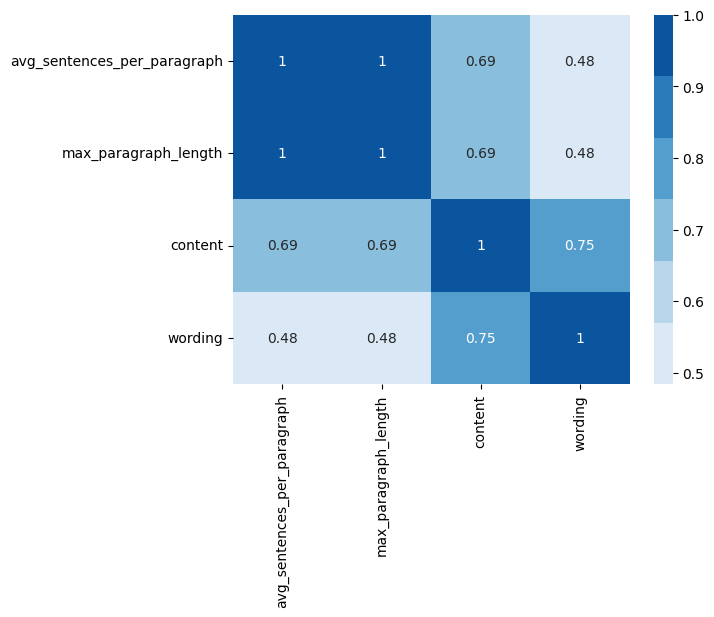

In [17]:
#Separating the Para features from a list into different columns for further analysis

# Expand the list of features into separate columns
df[['num_paragraphs', 'avg_sentences_per_paragraph', 'max_paragraph_length']] = pd.DataFrame(df['Para_Structure_features'].tolist(), index=df.index)

df.head()

# Since num_para is not that helpful obviously before omiting other features related to paragraph lets check if they work or not
# # Calculate the correlation between the paragraph-related features and content_score and wording
content_corr = df[['avg_sentences_per_paragraph', 'max_paragraph_length', 'content','wording']]



colormap = sns.color_palette("Blues")
sns.heatmap(content_corr.corr(), annot=True, cmap=colormap)



## **Section 3: Content and Wording (Q4, 10 points)**

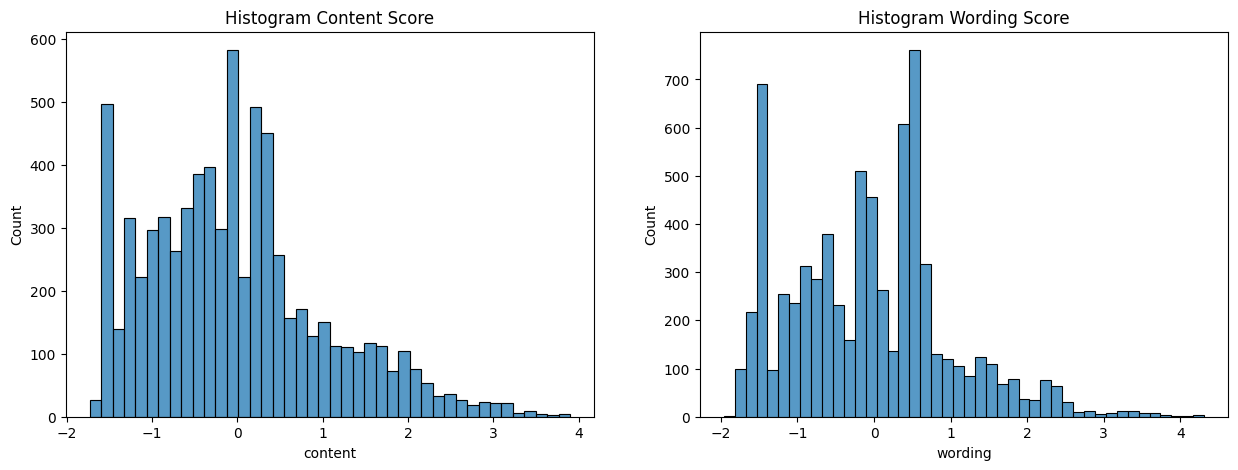

The Range of Content Score is --> 5.630185556899
The Range of wording Score is --> 6.27330694515344
Pearsons correlation: 0.751


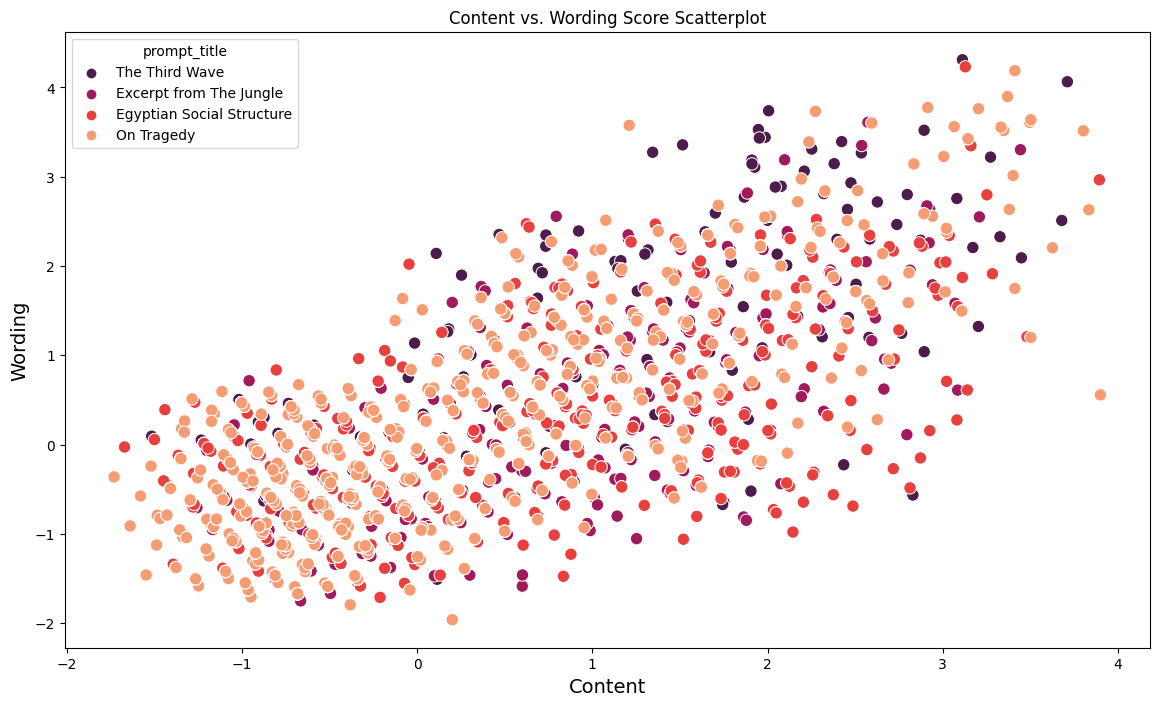

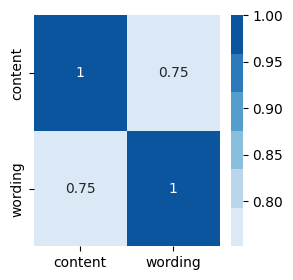

In [18]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.title('Histogram Content Score')
sns.histplot(data=df, x='content')
plt.subplot(1, 2, 2)
plt.title('Histogram Wording Score')
sns.histplot(data=df, x='wording')
plt.show()

plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x="content",y = 'wording',s = 80, hue ='prompt_title',palette='rocket')
plt.xlabel('Content',fontsize=14)
plt.ylabel('Wording',fontsize = 14)
plt.title('Content vs. Wording Score Scatterplot')


#Range MAX-MiN
range_content = df['content'].max()-df['content'].min()
print("The Range of Content Score is -->",range_content)

range_wording = df['wording'].max()-df['wording'].min()
print("The Range of wording Score is -->",range_wording)

#Relationships between the two targets:
plt.figure(figsize=(3,3))
sum_corr = df[['content','wording']]
colormap = sns.color_palette("Blues")
sns.heatmap(sum_corr.corr(), annot=True, cmap=colormap)

# Finding Pearson coefficient 
from scipy.stats import pearsonr
data1 = df['wording']
data2 = df['content']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)


Value of 0.75 shows that are they are very well correlated with one another and that they follow a linear nature

---------------------------------------------------------------------------------------------------------------------------------------------------------
To check if the shape of these distributions differ we need to visualize for every prompt id present

0       814d6b
1       814d6b
2       814d6b
3       814d6b
4       814d6b
         ...  
7160    39c16e
7161    39c16e
7162    39c16e
7163    39c16e
7164    39c16e
Name: prompt_id, Length: 7165, dtype: object
['814d6b' 'ebad26' '3b9047' '39c16e']


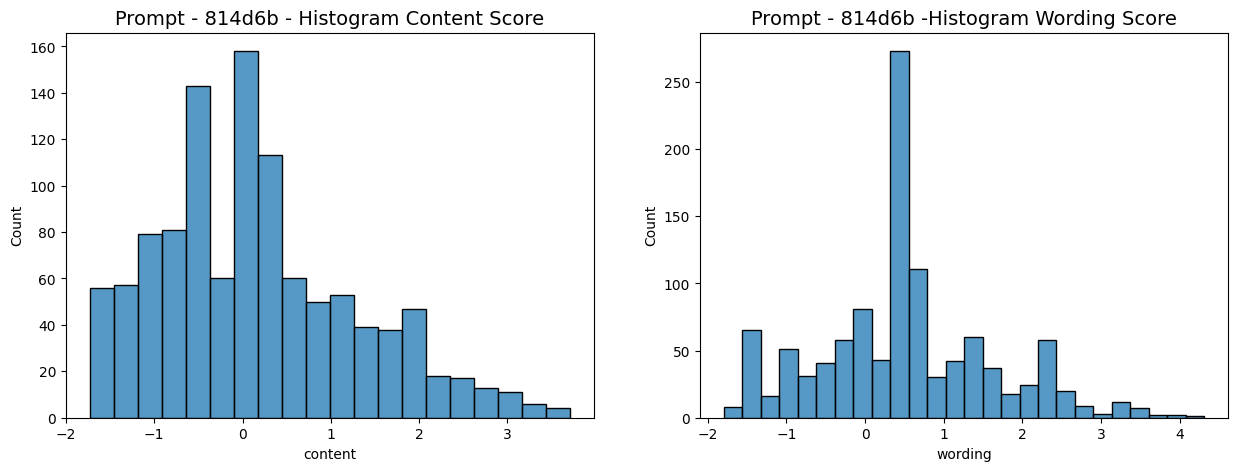

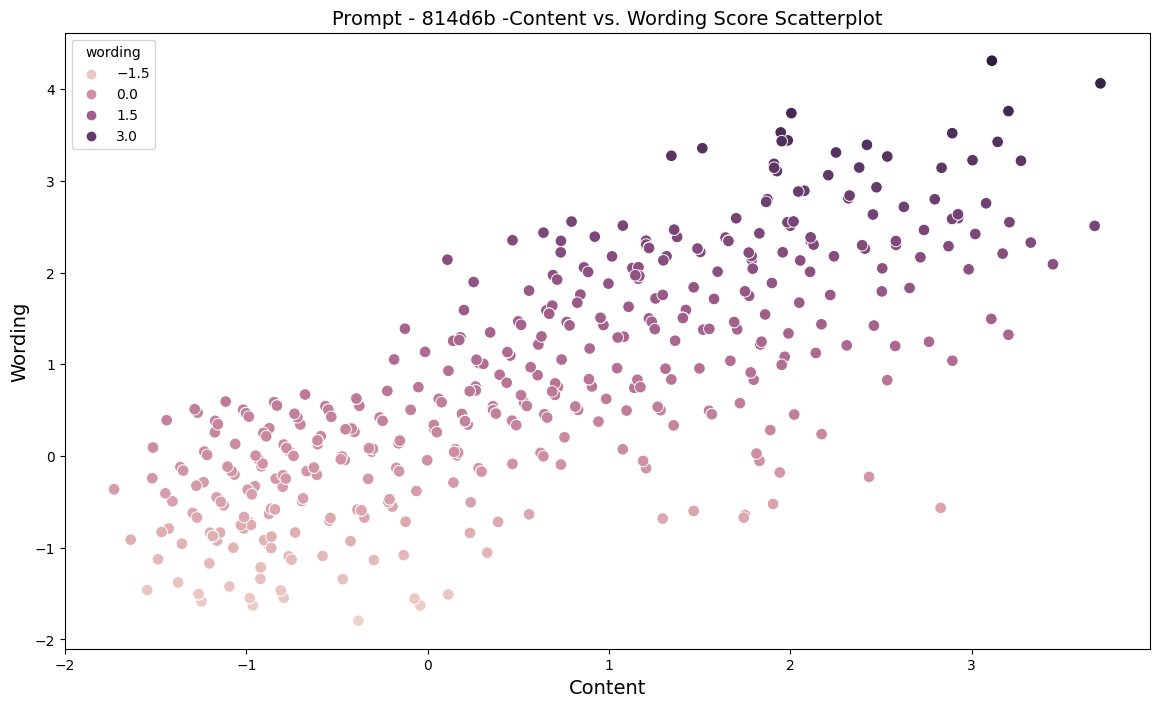

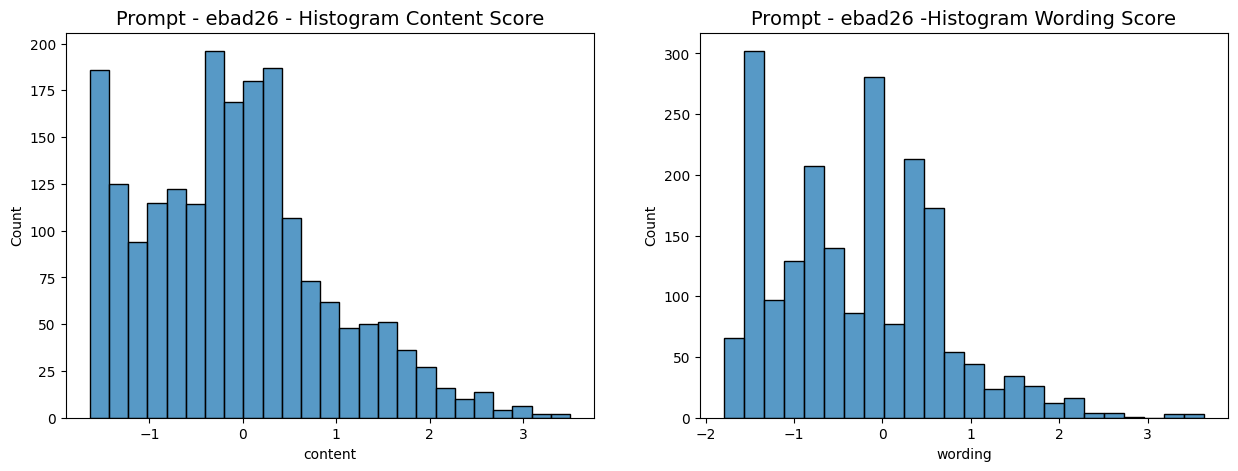

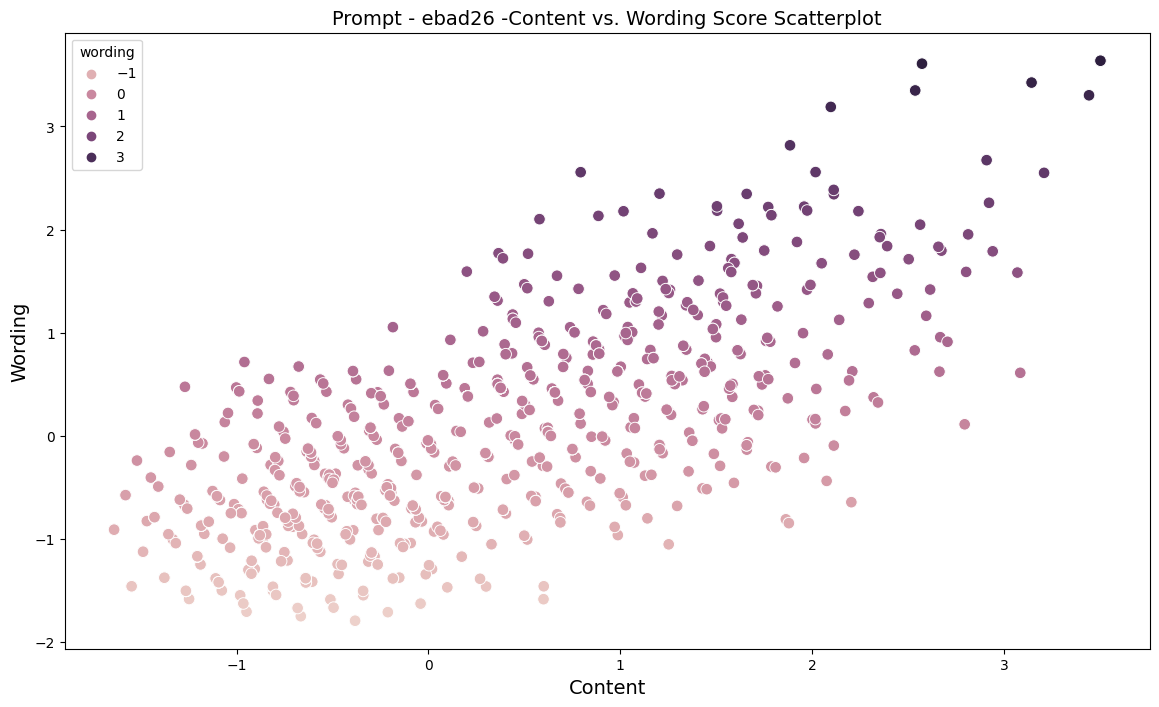

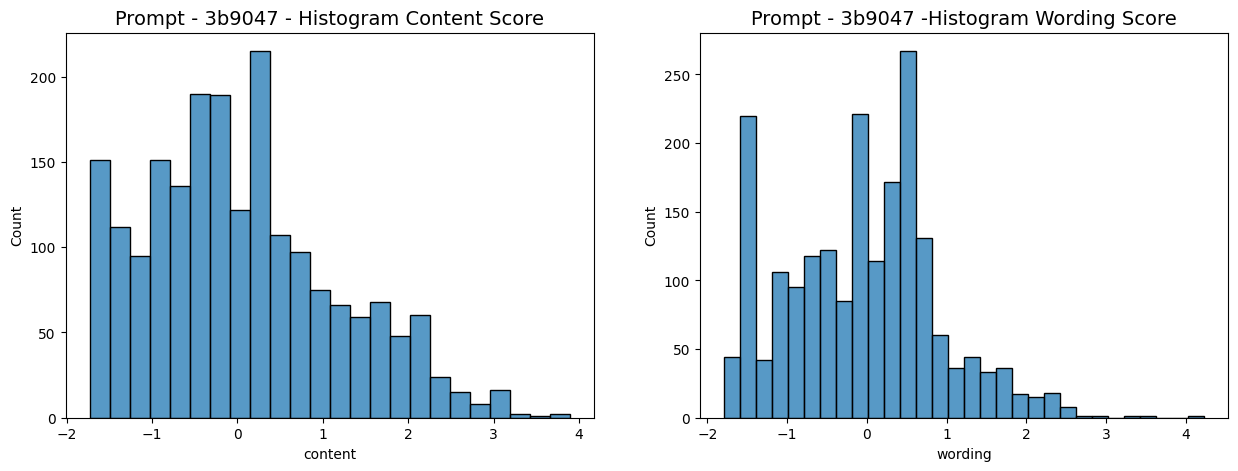

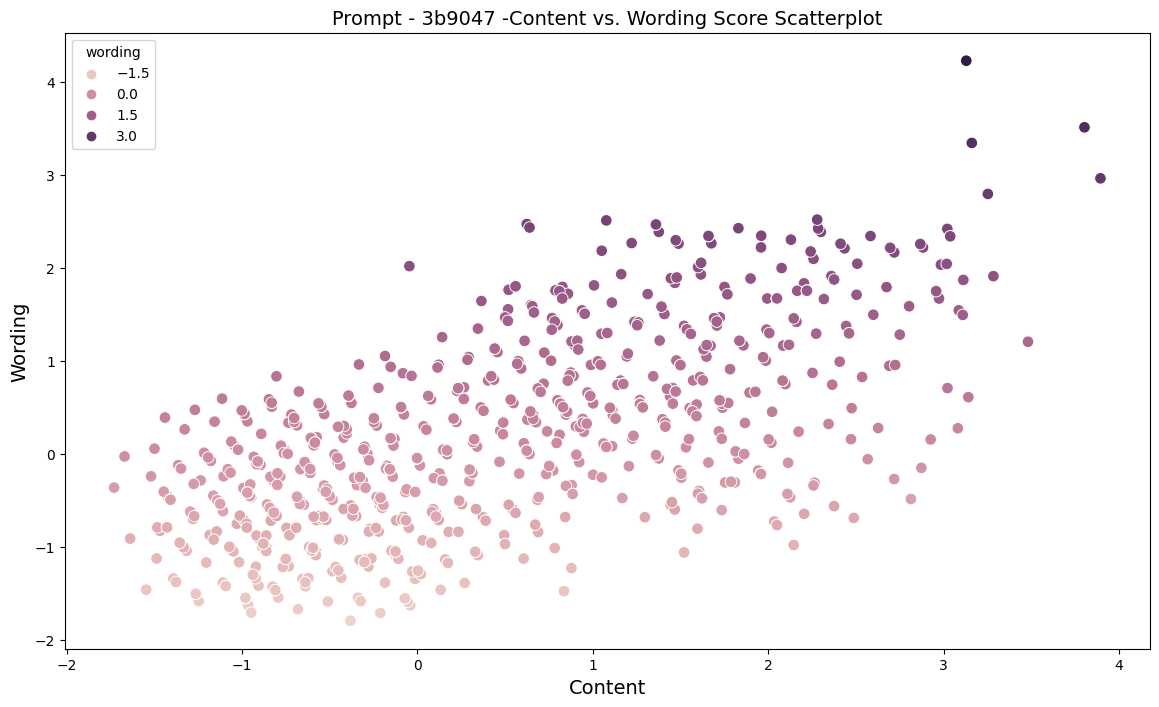

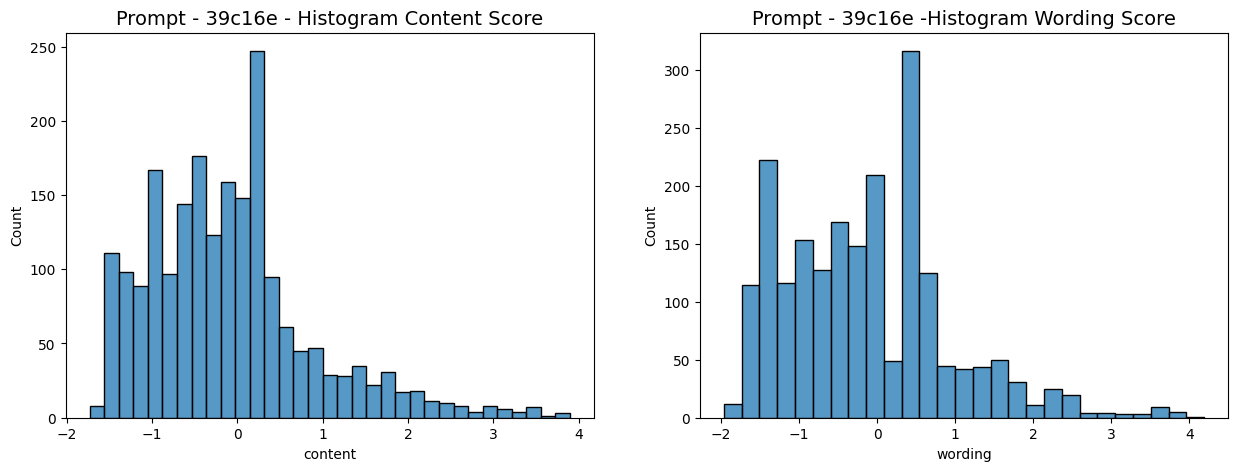

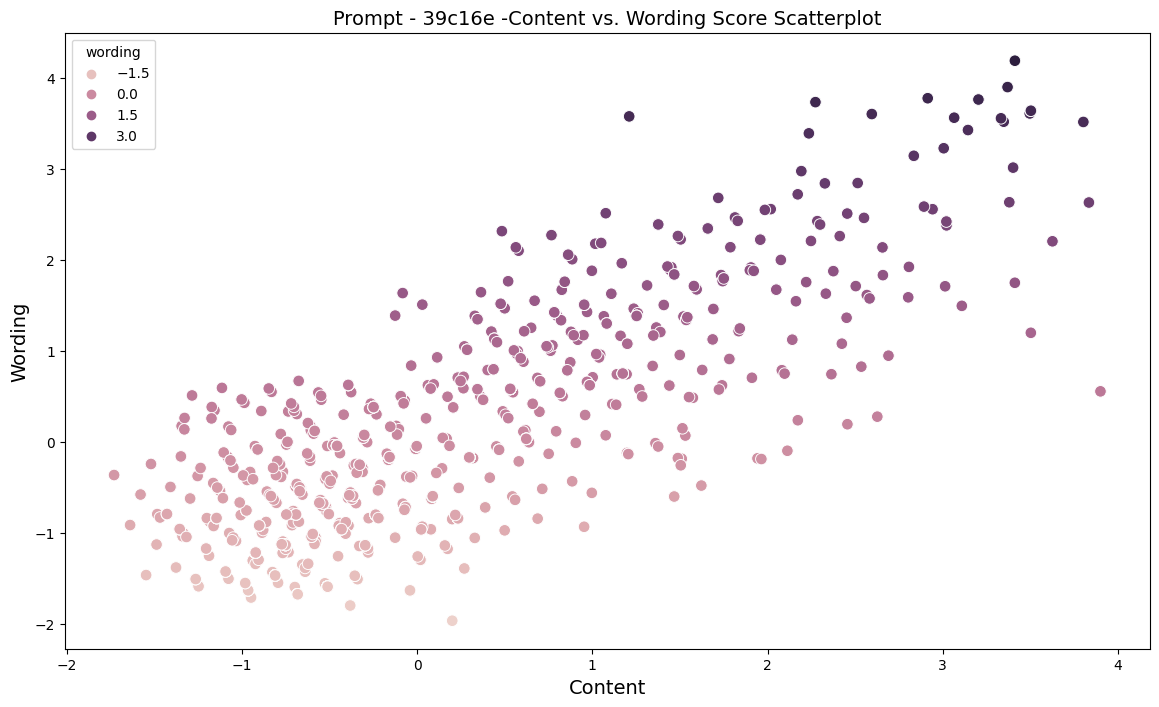

In [19]:

#Create an array of prompt ids

arr_promptid = df['prompt_id']
print(arr_promptid)
individual_prompt_id = df['prompt_id'].unique()

print(individual_prompt_id)

for prompt_id in individual_prompt_id:
    prompts = df[df['prompt_id'] == prompt_id]
    
    plt.figure(figsize = (15, 5))
    plt.subplot(121)
    plt.title(f'Prompt - {prompt_id} - Histogram Content Score',fontsize=14)
    sns.histplot(data=prompts, x='content')
    

    plt.subplot(122)
    plt.title(f'Prompt - {prompt_id} -Histogram Wording Score',fontsize=14)
    sns.histplot(data=prompts, x='wording')
    
    


    plt.figure(figsize=(14,8))
    
    sns.scatterplot(data=prompts,x="content",y = 'wording',s = 70, hue ='wording')
    plt.xlabel('Content',fontsize=14)
    plt.ylabel('Wording',fontsize = 14)
    plt.title(f'Prompt - {prompt_id} -Content vs. Wording Score Scatterplot',fontsize=14)
    


Scatter Plot values are mostly similar in all different prompts, fortifying the previous find that content and wording are highly correlated

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

Which words are over-represented in good essays (as per content and wording) while being under-represented in bad ones?  Conversely, which words appear disproportionately in the bad essays?   What is an appropriate statistic to use here? (10 points)

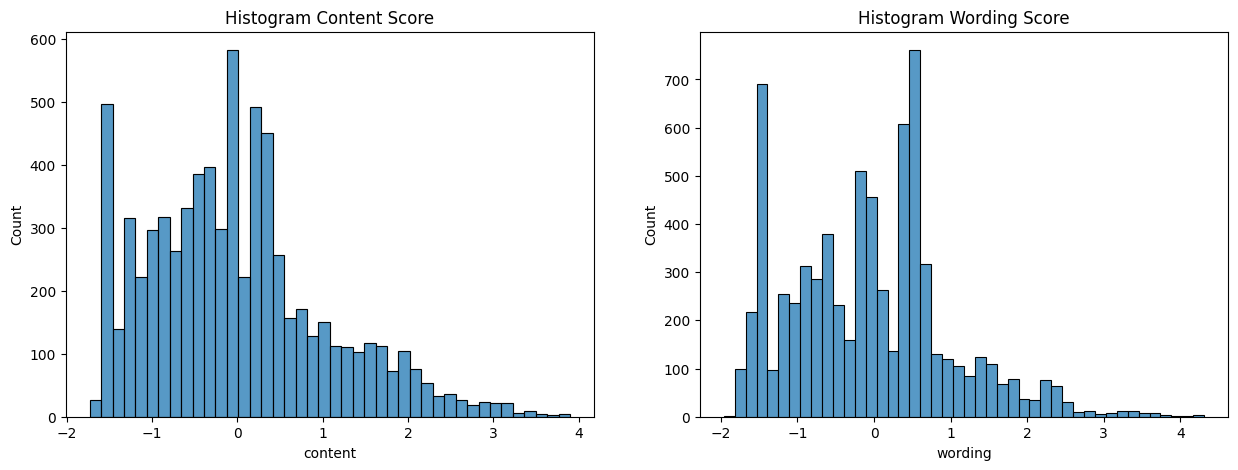

Text(0.5, 1.0, 'Content vs. Wording Score Scatterplot')

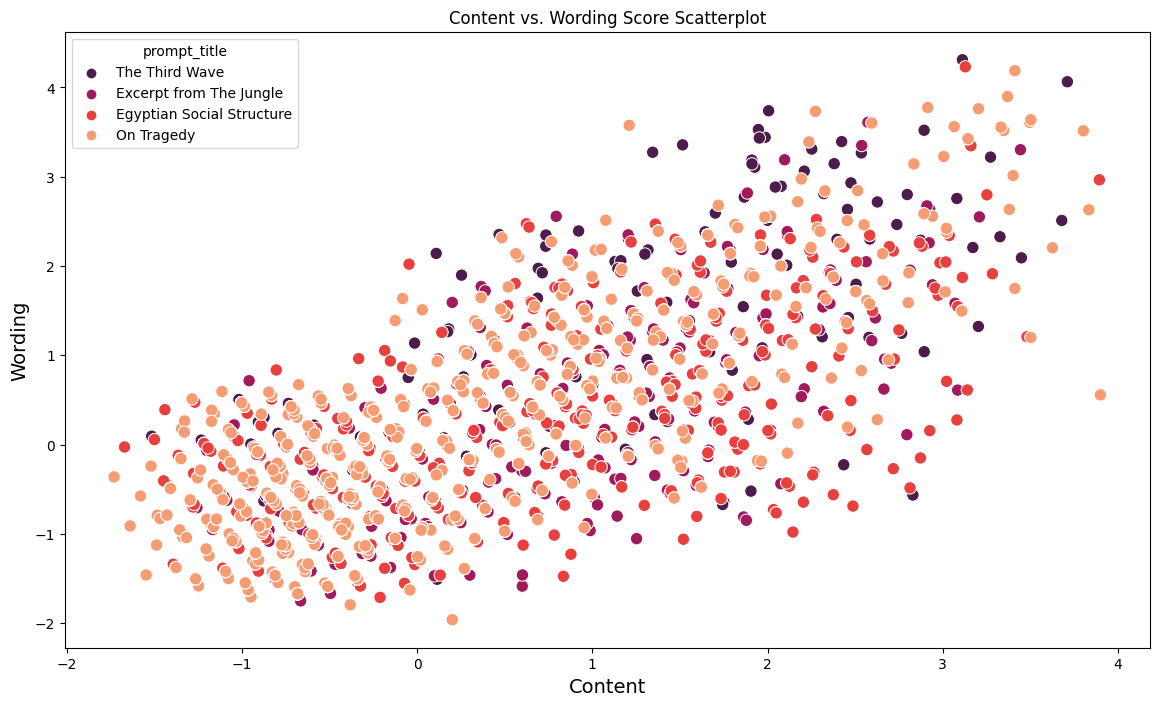

In [20]:
#To complete the task first we need to define what are good essays and what are bad essays.
#The Threshold can be taken out manually by observing the relations between them


plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.title('Histogram Content Score')
sns.histplot(data=df, x='content')
plt.subplot(1, 2, 2)
plt.title('Histogram Wording Score')
sns.histplot(data=df, x='wording')
plt.show()

plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x="content",y = 'wording',s = 80, hue ='prompt_title',palette='rocket')
plt.xlabel('Content',fontsize=14)
plt.ylabel('Wording',fontsize = 14)
plt.title('Content vs. Wording Score Scatterplot')


In [21]:
# Finding the perecentiles of the class 
required_percentiles = [.20, .40, .60, .80]
 

dtypes_inc = ['object', 'float', 'int']
 

stats = df.describe(percentiles=required_percentiles, include=dtypes_inc)
 

stats

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_word_cnt,prompt_text_word_cnt,...,Digit_cnt,sent_count,Avg_word_len,Lexical_diversity,Complex_sent_count,Para_Structure_features,grade_level,num_paragraphs,avg_sentences_per_paragraph,max_paragraph_length
count,7165,7165,7165,7165.000000,7165.000000,7165,7165,7165,7165.000000,7165.000000,...,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165,7165.000000,7165.0,7165.000000,7165.000000
unique,7165,4,7165,NaN,NaN,4,4,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN
top,000e8c3c7ddb,39c16e,The third wave was an experimentto see how peo...,NaN,NaN,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"[1, 3.0, 3]",NaN,NaN,NaN,NaN
freq,1,2057,1,NaN,NaN,2057,2057,2057,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1628,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-0.014853,-0.063072,NaN,NaN,NaN,76.155618,688.625960,...,0.378786,3.757851,4.563326,0.744993,2.678995,NaN,9.114613,1.0,3.757851,3.757851
std,NaN,NaN,NaN,1.043569,1.036048,NaN,NaN,NaN,54.538587,173.705465,...,0.937313,3.100199,0.419488,0.097417,2.307941,NaN,4.534061,0.0,3.100199,3.100199
min,NaN,NaN,NaN,-1.729859,-1.962614,NaN,NaN,NaN,22.000000,550.000000,...,0.000000,1.000000,3.258065,0.266667,0.000000,NaN,0.000000,1.0,1.000000,1.000000
20%,NaN,NaN,NaN,-0.973562,-1.050372,NaN,NaN,NaN,37.000000,550.000000,...,0.000000,2.000000,4.208205,0.659574,1.000000,NaN,5.700000,1.0,2.000000,2.000000
40%,NaN,NaN,NaN,-0.382272,-0.345192,NaN,NaN,NaN,50.000000,597.000000,...,0.000000,3.000000,4.438365,0.718750,2.000000,NaN,7.400000,1.0,3.000000,3.000000
50%,NaN,NaN,NaN,-0.093814,-0.081769,NaN,NaN,NaN,59.000000,604.000000,...,0.000000,3.000000,4.545455,0.745763,2.000000,NaN,8.200000,1.0,3.000000,3.000000


After observing the content and wording score distributions , Good Essays can be defined as those Essays that secure the top 40 percentile for both content score and wording score

In [22]:


content_score_threshold = 0.168226
wording_score_threshold = 0.291839

def classification(content_score,wording_score):
    if content_score >= content_score_threshold and wording_score >= wording_score_threshold:
        return 1
    else:
        return 0

df['essay_classification'] = df.apply(lambda row: classification(row['content'], row['wording']), axis=1)

# df

Good_count = (df['essay_classification']==1).sum()
Bad_count = (df['essay_classification']==0).sum()
print("Total Good essays",Good_count)
print("Total Bad Essays", Bad_count)

Total_essay = Good_count + Bad_count

print("Total number of essats", Total_essay)




Total Good essays 2045
Total Bad Essays 5120
Total number of essats 7165


Before finding out the words that are over represented we need to preprocess the data (Majorly Stopword Removal). Reason -> Words like 'and',etc will definitely have a significant count 
______________________________________________________________________________________________________________________________________________________

Preprocessing Data before moving forward

In [23]:
merge_df.head()
merge_df.isna().any()


merge_df.astype(dtypes)
merge_df.info()

# we have zero null values present so we can move forward

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       7165 non-null   object 
 1   prompt_id        7165 non-null   object 
 2   text             7165 non-null   object 
 3   content          7165 non-null   float64
 4   wording          7165 non-null   float64
 5   prompt_question  7165 non-null   object 
 6   prompt_title     7165 non-null   object 
 7   prompt_text      7165 non-null   object 
dtypes: float64(2), object(6)
memory usage: 447.9+ KB


In [24]:
#Stopwords Preprocessing
preprocessed_df = merge_df.copy()


"""
#stopword count in spacy is greater than nltk thats why we are using spacy 
import spacy
nlp = spacy.load('en_core_web_sm')

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
    doc = nlp(sentence)
    filtered_words = [token.text for token in doc if not token.is_stop]
    return ' '.join(filtered_words)


preprocessed_df['Text_new'] = preprocessed_df['text'].apply(lambda x: remove_stop_words(x))

preprocessed_df.drop(columns=('text'),inplace=True)
preprocessed_df


"""    

"\n#stopword count in spacy is greater than nltk thats why we are using spacy \nimport spacy\nnlp = spacy.load('en_core_web_sm')\n\n# Define a function to remove stop words from a sentence\ndef remove_stop_words(sentence):\n    doc = nlp(sentence)\n    filtered_words = [token.text for token in doc if not token.is_stop]\n    return ' '.join(filtered_words)\n\n\npreprocessed_df['Text_new'] = preprocessed_df['text'].apply(lambda x: remove_stop_words(x))\n\npreprocessed_df.drop(columns=('text'),inplace=True)\npreprocessed_df\n\n\n"

Using Spacy and model en_core_web_sm majority of the stopwords can be removed , However removing this stop words is going to hamper other features like complex sentence construction and others. Also we can see later on in the heatmaps that stopwords are significant features .  To overcome this we will calculate them later on just to calculate the over-representation than adding it as a step of pre-processing

In [25]:
#Text lowercase

def text_lower(text):
    return text.lower()
    
preprocessed_df['Text'] = preprocessed_df['text'].apply(lambda x: text_lower(x))

preprocessed_df.drop(columns=('text'),inplace=True)
preprocessed_df

,student_id,prompt_id,content,wording,prompt_question,prompt_title,prompt_text,Text
0,000e8c3c7ddb,814d6b,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave was an experimentto see how peo...
1,0070c9e7af47,814d6b,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave developed rapidly because the ...
2,0095993991fe,814d6b,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave only started as an experiment w...
3,00c20c6ddd23,814d6b,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the experimen was orginally about how even whe...
4,00d40ad10dc9,814d6b,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave developed so quickly due to the...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,"it has to be made on a complex storyline, with..."
7161,ff0f65eecf02,39c16e,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,aristotle descirbes an ideal tradgedy as being...
7162,ff186473ea0a,39c16e,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,a tragedy should have a complex plan not a sim...
7163,ff5e9e6068da,39c16e,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,aristotle believed that the ideal tradegy shou...


In [26]:
# It can be noticed that many summaries contain the reference to the paragraph and there numbers removing them

def remove_words_starting_with(text, start_letters):
    # Define a regular expression pattern to match words starting with specific letters
    pattern = r'\b(?:' + start_letters + r'\w*)\b'
    
    # Use re.sub to replace matched words with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

preprocessed_df['Text'] = preprocessed_df['Text'].apply(lambda x: remove_words_starting_with(x, "Para|paragraph"))



In [27]:
#Then Removing numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# Remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


preprocessed_df['Text_new'] = preprocessed_df['Text'].apply(lambda x: remove_numbers(x))


preprocessed_df.drop(columns=('Text'),inplace=True)

preprocessed_df['Text'] = preprocessed_df['Text_new'].apply(lambda x: remove_punctuation(x))
preprocessed_df.drop(columns=('Text_new'),inplace=True)
preprocessed_df

,student_id,prompt_id,content,wording,prompt_question,prompt_title,prompt_text,Text
0,000e8c3c7ddb,814d6b,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave was an experimentto see how peo...
1,0070c9e7af47,814d6b,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave developed rapidly because the ...
2,0095993991fe,814d6b,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave only started as an experiment w...
3,00c20c6ddd23,814d6b,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the experimen was orginally about how even whe...
4,00d40ad10dc9,814d6b,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave developed so quickly due to the...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,it has to be made on a complex storyline with ...
7161,ff0f65eecf02,39c16e,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,aristotle descirbes an ideal tradgedy as being...
7162,ff186473ea0a,39c16e,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,a tragedy should have a complex plan not a sim...
7163,ff5e9e6068da,39c16e,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,aristotle believed that the ideal tradegy shou...


In [28]:
#Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    lemmas = [lemmatizer.lemmatize(word, pos ='r') for word in word_tokens]
    lemmatized_text = ' '.join(lemmas)
    return lemmatized_text

preprocessed_df['Text'] = preprocessed_df['Text'].apply(lambda x: lemmatize_word(x))




In [29]:

print(preprocessed_df.query("prompt_id == '814d6b'").Text[0])
print('\n')


the third wave was an experimentto see how people reacted to a new one leader government it gained popularity as people wanted to try new things the students follow anything that is said and start turning on eachother to gain higher power they had to stop the experement as too many people got to radical with it blindly following there leader




In [30]:
preprocessed_df.head()

,student_id,prompt_id,content,wording,prompt_question,prompt_title,prompt_text,Text
0,000e8c3c7ddb,814d6b,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave was an experimentto see how peo...
1,0070c9e7af47,814d6b,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave developed rapidly because the s...
2,0095993991fe,814d6b,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave only started as an experiment w...
3,00c20c6ddd23,814d6b,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the experimen was orginally about how even whe...
4,00d40ad10dc9,814d6b,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,the third wave developed so quickly due to the...


Calculating the features again for the proprocessed text.

In [31]:
#before calculating features lets remove the same stopwords from prompt_text , prompt_question , prompt_title so as to get appropriate distinct and common count
#Preprocessing all those columns

#Warning! This block is requires time to execute due to shear volume of computations


preprocessed_df

# preprocessed_df['prompt_question'] = preprocessed_df['prompt_question'].apply(lambda x: remove_stop_words(x))
preprocessed_df['prompt_question'] = preprocessed_df['prompt_question'].apply(lambda x: lemmatize_word(x))
preprocessed_df['prompt_question'] = preprocessed_df['prompt_question'].apply(lambda x: remove_punctuation(x))
preprocessed_df['prompt_question'] = preprocessed_df['prompt_question'].apply(lambda x: remove_numbers(x))
preprocessed_df['prompt_question'] = preprocessed_df['prompt_question'].apply(lambda x: text_lower(x))

# preprocessed_df['prompt_title'] = preprocessed_df['prompt_title'].apply(lambda x: remove_stop_words(x))
preprocessed_df['prompt_title'] = preprocessed_df['prompt_title'].apply(lambda x: lemmatize_word(x))
preprocessed_df['prompt_title'] = preprocessed_df['prompt_title'].apply(lambda x: remove_punctuation(x))
preprocessed_df['prompt_title'] = preprocessed_df['prompt_title'].apply(lambda x: remove_numbers(x))
preprocessed_df['prompt_title'] = preprocessed_df['prompt_title'].apply(lambda x: text_lower(x))

# preprocessed_df['prompt_text'] = preprocessed_df['prompt_text'].apply(lambda x: remove_stop_words(x))
preprocessed_df['prompt_text'] = preprocessed_df['prompt_text'].apply(lambda x: lemmatize_word(x))
preprocessed_df['prompt_text'] = preprocessed_df['prompt_text'].apply(lambda x: remove_punctuation(x))
preprocessed_df['prompt_text'] = preprocessed_df['prompt_text'].apply(lambda x: remove_numbers(x))
preprocessed_df['prompt_text'] = preprocessed_df['prompt_text'].apply(lambda x: text_lower(x))







Again Stopwords removal is commented cause we notice in the heatmap that they are significant.

In [32]:
preprocessed_df

,student_id,prompt_id,content,wording,prompt_question,prompt_title,prompt_text,Text
0,000e8c3c7ddb,814d6b,0.205683,0.380538,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave was an experimentto see how peo...
1,0070c9e7af47,814d6b,3.272894,3.219757,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave developed rapidly because the s...
2,0095993991fe,814d6b,0.205683,0.380538,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave only started as an experiment w...
3,00c20c6ddd23,814d6b,0.567975,0.969062,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the experimen was orginally about how even whe...
4,00d40ad10dc9,814d6b,-0.910596,-0.081769,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave developed so quickly due to the...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,-0.981265,-1.548900,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,it has to be made on a complex storyline with ...
7161,ff0f65eecf02,39c16e,-0.511077,-1.589115,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,aristotle descirbes an ideal tradgedy as being...
7162,ff186473ea0a,39c16e,-0.834946,-0.593749,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,a tragedy should have a complex plan not a sim...
7163,ff5e9e6068da,39c16e,-0.157460,-0.165811,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,aristotle believed that the ideal tradegy shou...


In [33]:
#Q5 ------------------------->
#Warning! This block is requires time to execute due to shear volume of computations
#To get the over representation we are going to compute the tfidf


from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import chi2_contingency

# Split Summaries and labels(Good or Bad)
summaries = preprocessed_df['Text']
labels = df['essay_classification']

#stopword count in spacy is greater than nltk thats why we are using spacy 
import spacy
nlp = spacy.load('en_core_web_sm')

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
    doc = nlp(sentence)
    filtered_words = [token.text for token in doc if not token.is_stop]
    return ' '.join(filtered_words)

summaries = summaries.apply(remove_stop_words)

# TF-IDF
vectors = TfidfVectorizer()
tfidf_matrix = vectors.fit_transform(summaries)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectors.get_feature_names_out())

# Add labels to the DataFrame
tfidf_df['label'] = labels

# Calculate Chi-squared statistic for each word
chi2_stats = []
for word in tfidf_df.columns[:-1]:
    crosstab = pd.crosstab(tfidf_df[word], tfidf_df['label'])
    chi2, p, _, _ = chi2_contingency(crosstab)
    chi2_stats.append((word, chi2, p))

# Sort words by Chi-squared statistic
chi2_stats.sort(key=lambda x: x[1], reverse=True)

# Print top words over-represented in "good" essays and under-represented in "bad" essays
print("Top words over-represented in 'good' essays:")
num_top_words = 20
for i in range(num_top_words):
    word, chi2, p = chi2_stats[i]
    print(f"Word: {word}, Chi-squared: {chi2}, p-value: {p}")

# Print top words over-represented in "bad" essays
print("\nTop words over-represented in 'bad' essays:")
for i in range(-1, -(num_top_words + 1), -1):
    word, chi2, p = chi2_stats[i]
    print(f"Word: {word}, Chi-squared: {chi2}, p-value: {p}")



Top words over-represented in 'good' essays:
Word: label, Chi-squared: 7160.097757262838, p-value: 0.0
Word: people, Chi-squared: 1989.744079652752, p-value: 1.5452878635807274e-18
Word: bad, Chi-squared: 1845.433758596586, p-value: 9.890222059161917e-06
Word: good, Chi-squared: 1778.6271714131508, p-value: 3.1376639292362496e-05
Word: meat, Chi-squared: 1713.1837452626078, p-value: 0.8895467469053405
Word: tragedy, Chi-squared: 1684.4704839007827, p-value: 0.015159039218131644
Word: like, Chi-squared: 1552.1406940813729, p-value: 1.5869713346503888e-08
Word: slaves, Chi-squared: 1458.6273955529548, p-value: 1.601196622560903e-08
Word: spoiled, Chi-squared: 1339.8087494430445, p-value: 0.0817519642700155
Word: farmers, Chi-squared: 1315.2707660551614, p-value: 1.4177034646063664e-10
Word: social, Chi-squared: 1295.0654673255842, p-value: 6.002855374979607e-05
Word: class, Chi-squared: 1278.9253698105615, p-value: 1.2841112236369502e-15
Word: ideal, Chi-squared: 1275.4289673136232, p-va

------------------------------------------------------------------------------------------------------------------------------------------------------
Addiing Features for the preprocessed data

In [34]:
#Warning! This block is requires time to execute due to shear volume of computations
preprocessed_df

import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")


def calculate_tense_consistency(text):
    doc = nlp(text)
    tense_consistency = set()

    for sent in doc.sents:
        for token in sent:
            if "VERB" in token.pos_:
                tense_consistency.add(token.tag_)

    return len(tense_consistency)


import textstat
def calculate_fkgl(text):
    try:
        # Calculate the Flesch-Kincaid Grade Level
        fkgl = textstat.flesch_kincaid_grade(text)
        return fkgl
    except Exception as e:
        # Handle any exceptions, e.g., if the text is empty or cannot be analyzed
        print(f"Error calculating FKGL: {e}")
        return None





def data_prep(preprocessed_df: pd.DataFrame, feature: str = 'Text', prompt_feature: str = 'prompt_text', 
             prompt_question_feature: str = 'prompt_question', prompt_title_feature: str = 'prompt_title') -> pd.DataFrame:

    
    # Make a copy of the original DataFrame
    data_frame = preprocessed_df.copy()
    
    # Calculate number of words in text and prompt text
    data_frame[f'{feature}_word_cnt'] = data_frame[feature].apply(lambda x: len(x.split(' ')))
    
    data_frame[f'{prompt_feature}_word_cnt'] = data_frame[prompt_feature].apply(lambda x: len(x.split(' ')))

    # Calculate number of distinct words in text and prompt text
    data_frame[f'{feature}_distinct_word_count'] = data_frame[feature].apply(count_distinct_words)
    
    data_frame[f'{prompt_feature}_distinct_word_count'] = data_frame[prompt_feature].apply(count_distinct_words)
    
    # Calculate common words between student response and prompt_text
    data_frame['common_words_response_prompt'] = data_frame.apply(lambda row: 
                                                               count_common_words(row[feature], row[prompt_feature]), 
                                                               axis=1)
    
    # Calculate common words between student response and prompt_question
    data_frame['common_words_response_question'] = data_frame.apply(lambda row: 
                                                                count_common_words(row[feature], row[prompt_question_feature]), 
                                                                axis=1)
    
    # Calculate common words between student response and prompt_title
    data_frame['common_words_response_title'] = data_frame.apply(lambda row: 
                                                              count_common_words(row[feature], row[prompt_title_feature]), 
                                                              axis=1)

    # Question 3 Features -->
    # Number of characters in text including the number of whitespaces
    data_frame['character_len_inc_whitespaces'] = data_frame[feature].apply(lambda x : len(str(x)))

    # Calculate the number of stopwords
    data_frame['stopword_cnt'] = data_frame[feature].apply(lambda x: stopword_count(x))

    # # Calculate the number of punctuations
    # data_frame['punct_cnt'] = data_frame[feature].apply(lambda x: punct_count(x))

    # # Calculate the number of digit_count
    # data_frame['Digit_cnt'] = data_frame[feature].apply(lambda x: digit_count(x))

    # Calculate the number of sentences
    data_frame['sent_count'] = data_frame[feature].apply(lambda x: get_sent_count(x))

    # Calculate the average word length in text
    data_frame['Avg_word_len'] = data_frame[feature].apply(lambda x : np.mean([len(w) for w in str(x).split()]))

    # Calculate the number of paragraphs in a text
    #data_frame['Num_of_Para'] = data_frame [feature].apply(lambda x: len(x.split('\n')))

    # Calculate Lexical diversity as a ratio
    data_frame['Lexical_diversity'] = data_frame[feature].apply(lexical_diversity)

    # Calculate the count of Complex Sentences used
    data_frame['Complex_sent_count'] = data_frame[feature].apply(Complex_sentences_count)

    # # Calculate the count of Complex Sentences used ( Since we have only one paragraph as a summary there isn't much point in exploring this features any further)
    # data_frame['Para_Structure_features'] = data_frame[feature].apply(Structure_para)

    #Grade level
    data_frame['Grade_Level'] = data_frame[feature].apply(lambda x : calculate_fkgl(x))
    

    # Calculate the count of tense consistency
    data_frame['Tense_consistency_count'] = data_frame[feature].apply(calculate_tense_consistency)
    
    return data_frame

# Create a new DataFrame with the additional features
new_df = data_prep(preprocessed_df)

#Separating the Para features from a list into different columns for further analysis
# # Expand the list of features into separate columns
# new_df[['num_paragraphs', 'avg_sentences_per_paragraph', 'max_paragraph_length']] = pd.DataFrame(new_df['Para_Structure_features'].tolist(), index=new_df.index)

new_df


,student_id,prompt_id,content,wording,prompt_question,prompt_title,prompt_text,Text,Text_word_cnt,prompt_text_word_cnt,...,common_words_response_question,common_words_response_title,character_len_inc_whitespaces,stopword_cnt,sent_count,Avg_word_len,Lexical_diversity,Complex_sent_count,Grade_Level,Tense_consistency_count
0,000e8c3c7ddb,814d6b,0.205683,0.380538,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave was an experimentto see how peo...,61,660,...,7,3,343,25,1,4.639344,0.803279,1,25.9,5
1,0070c9e7af47,814d6b,3.272894,3.219757,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave developed rapidly because the s...,200,660,...,10,3,1181,93,1,4.910000,0.620000,1,80.1,4
2,0095993991fe,814d6b,0.205683,0.380538,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave only started as an experiment w...,60,660,...,7,3,336,27,1,4.616667,0.766667,1,24.3,3
3,00c20c6ddd23,814d6b,0.567975,0.969062,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the experimen was orginally about how even whe...,76,660,...,9,3,441,38,1,4.815789,0.697368,1,31.8,4
4,00d40ad10dc9,814d6b,-0.910596,-0.081769,summarize how the third wave developed over su...,the third wave,background the third wave experiment took plac...,the third wave developed so quickly due to the...,27,660,...,8,3,143,12,1,4.333333,0.888889,1,11.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,-0.981265,-1.548900,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,it has to be made on a complex storyline with ...,33,699,...,1,2,179,16,1,4.454545,0.909091,1,13.8,4
7161,ff0f65eecf02,39c16e,-0.511077,-1.589115,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,aristotle descirbes an ideal tradgedy as being...,30,699,...,4,1,160,15,1,4.366667,0.900000,1,11.5,2
7162,ff186473ea0a,39c16e,-0.834946,-0.593749,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,a tragedy should have a complex plan not a sim...,29,699,...,1,1,147,16,1,4.103448,0.724138,0,9.9,1
7163,ff5e9e6068da,39c16e,-0.157460,-0.165811,summarize at least elements of an ideal trage...,on tragedy,chapter as the sequel to what has already bee...,aristotle believed that the ideal tradegy shou...,51,699,...,4,2,294,22,1,4.784314,0.705882,0,20.0,5


## **Section 5: Three Interesting Plots (Q6, 15 points)**

Q6.Create three plots of your own using the dataset that you think reveal something very interesting. Explain what it is, and anything else you learned from your exploration. (15 points)

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       7165 non-null   object 
 1   prompt_id                        7165 non-null   object 
 2   content                          7165 non-null   float64
 3   wording                          7165 non-null   float64
 4   prompt_question                  7165 non-null   object 
 5   prompt_title                     7165 non-null   object 
 6   prompt_text                      7165 non-null   object 
 7   Text                             7165 non-null   object 
 8   Text_word_cnt                    7165 non-null   int64  
 9   prompt_text_word_cnt             7165 non-null   int64  
 10  Text_distinct_word_count         7165 non-null   int64  
 11  prompt_text_distinct_word_count  7165 non-null   int64  
 12  common_words_respons

# A - Heatmaps between processed data and given data

<Axes: title={'center': 'Heatmap for Processed Dataset'}>

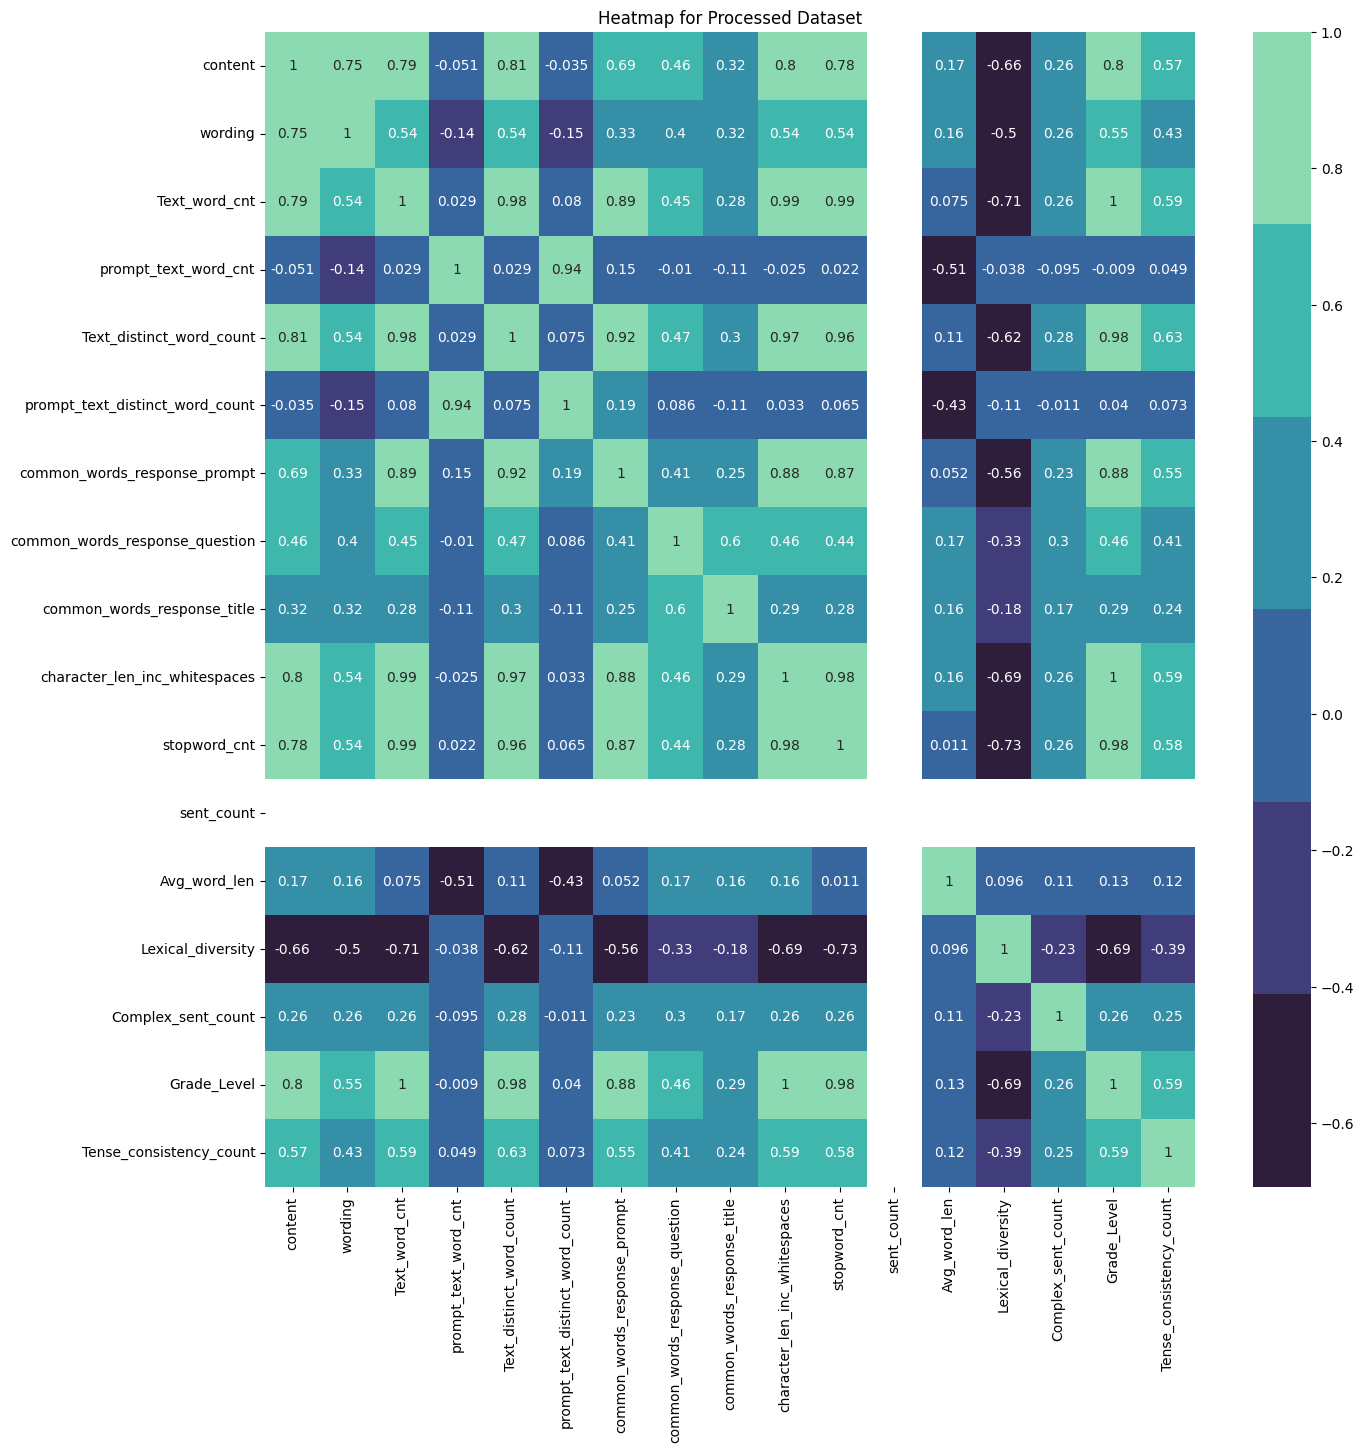

In [36]:



#Check the heatmap for the features of this preprocessed dataset
new_df_filter = new_df[['content','wording','Text_word_cnt','prompt_text_word_cnt','Text_distinct_word_count',
'prompt_text_distinct_word_count','common_words_response_prompt','common_words_response_question','common_words_response_title','character_len_inc_whitespaces',
'stopword_cnt','sent_count','Avg_word_len','Lexical_diversity','Complex_sent_count','Grade_Level','Tense_consistency_count']]
#Relationships 
plt.figure(figsize=(15,15))
colormap = sns.color_palette("mako")
plt.title("Heatmap for Processed Dataset")
sns.heatmap(new_df_filter.corr(), annot=True, cmap=colormap,robust=True)

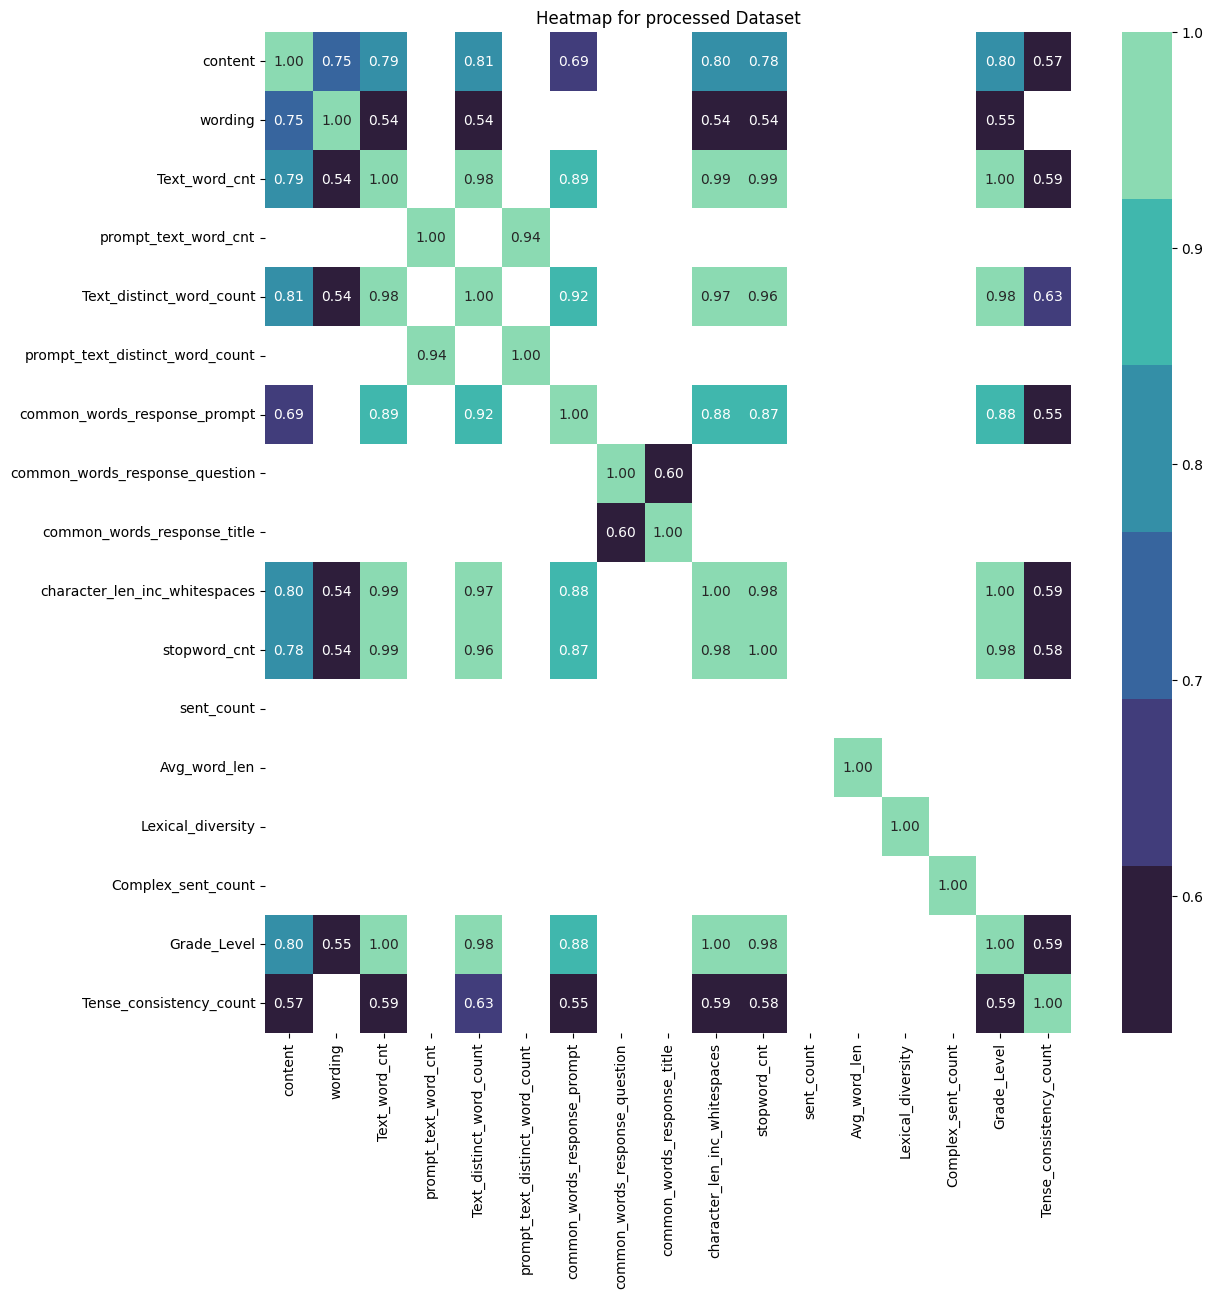

In [37]:
#Using chatgpt

# Calculate the correlation matrix
corr_matrix_new = new_df_filter.corr()

# Define the threshold for annotations (0.6 in this case)
threshold_for_corr = 0.5

# Create a mask to hide annotations for values below the threshold
mask = (corr_matrix_new <= threshold_for_corr)

# Create the heatmap with annotations only for values greater than 0.6
plt.figure(figsize=(13, 13))
colormap = sns.color_palette("mako")
plt.title("Heatmap for processed Dataset")
sns.heatmap(corr_matrix_new, annot=True, cmap=colormap, mask=mask, robust=True, fmt=".2f")

# Show the heatmap
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       7165 non-null   object 
 1   prompt_id                        7165 non-null   object 
 2   text                             7165 non-null   object 
 3   content                          7165 non-null   float64
 4   wording                          7165 non-null   float64
 5   prompt_question                  7165 non-null   object 
 6   prompt_title                     7165 non-null   object 
 7   prompt_text                      7165 non-null   object 
 8   text_word_cnt                    7165 non-null   int64  
 9   prompt_text_word_cnt             7165 non-null   int64  
 10  text_distinct_word_count         7165 non-null   int64  
 11  prompt_text_distinct_word_count  7165 non-null   int64  
 12  common_words_respons

<Axes: >

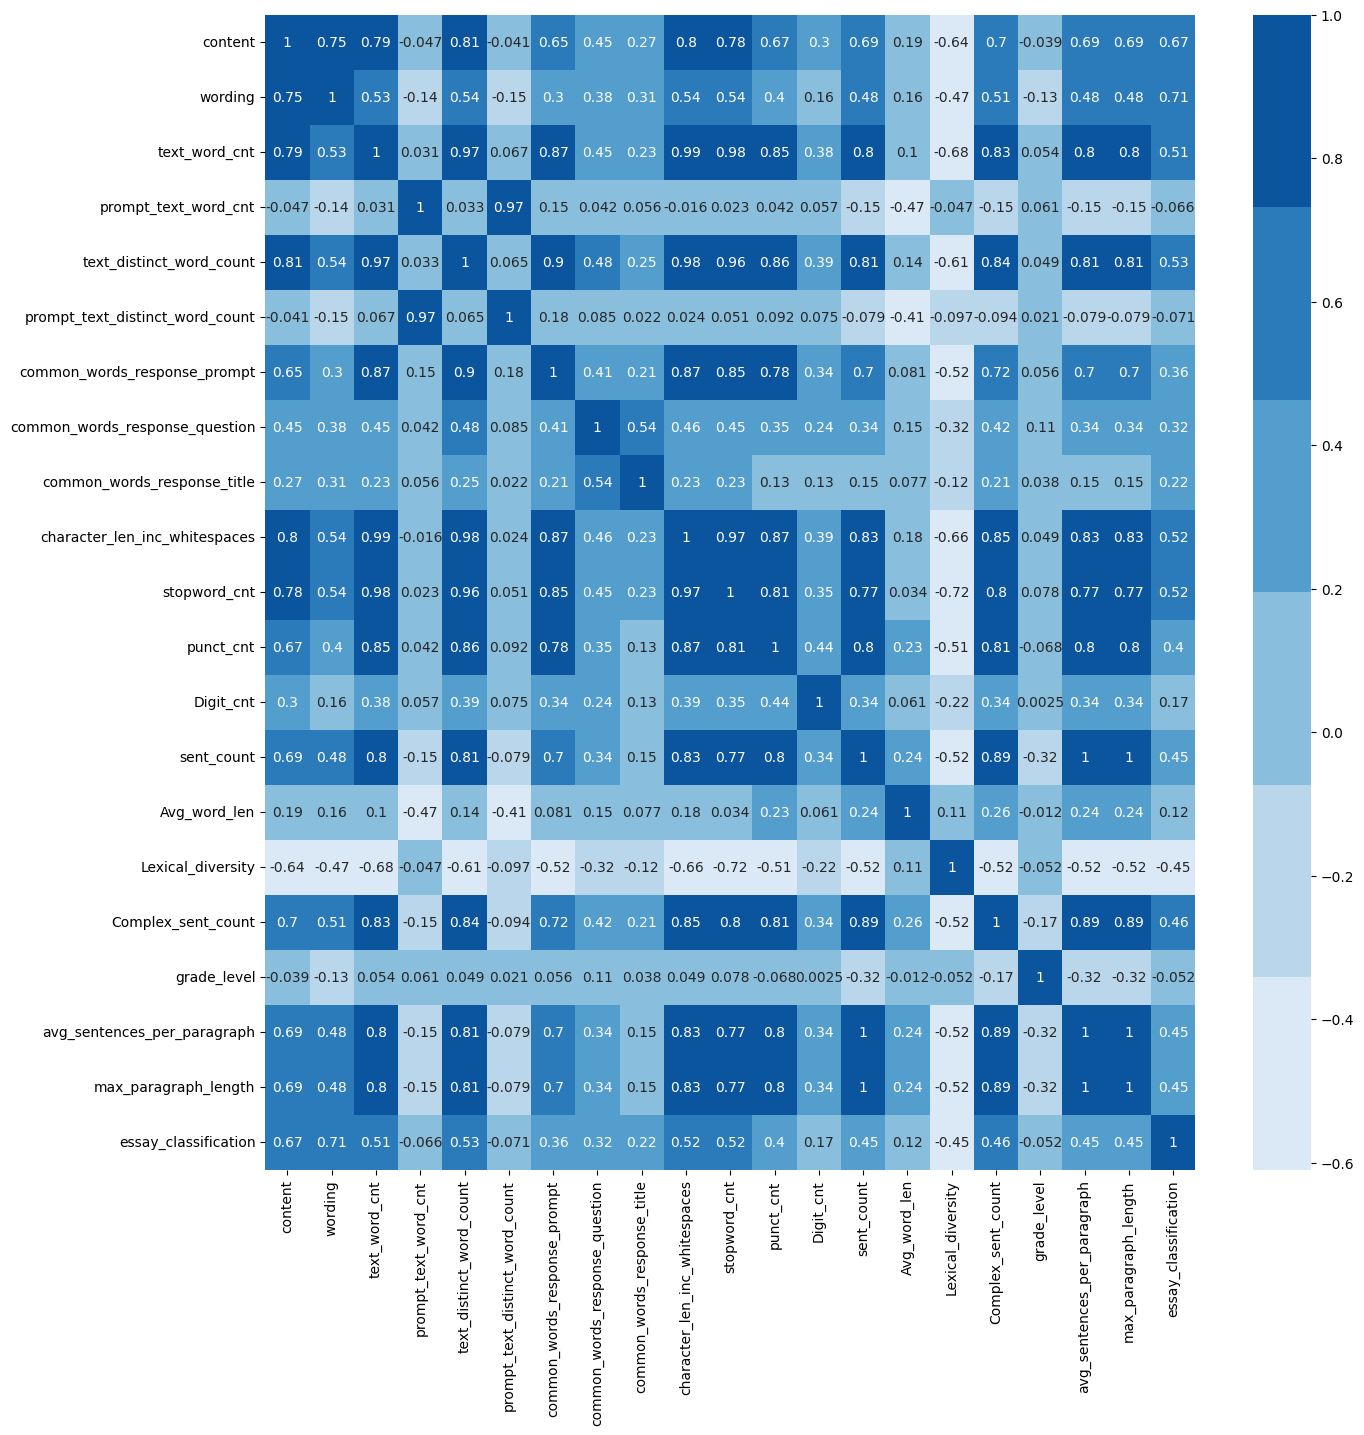

In [39]:

df_filter = df[['content','wording','text_word_cnt','prompt_text_word_cnt','text_distinct_word_count',
'prompt_text_distinct_word_count','common_words_response_prompt','common_words_response_question','common_words_response_title','character_len_inc_whitespaces',
'stopword_cnt','punct_cnt','Digit_cnt','sent_count','Avg_word_len','Lexical_diversity','Complex_sent_count','grade_level','avg_sentences_per_paragraph','max_paragraph_length','essay_classification']]
#Relationships 
plt.figure(figsize=(15,15))
colormap = sns.color_palette("Blues")
sns.heatmap(df_filter.corr(), annot=True, cmap=colormap,robust=True)



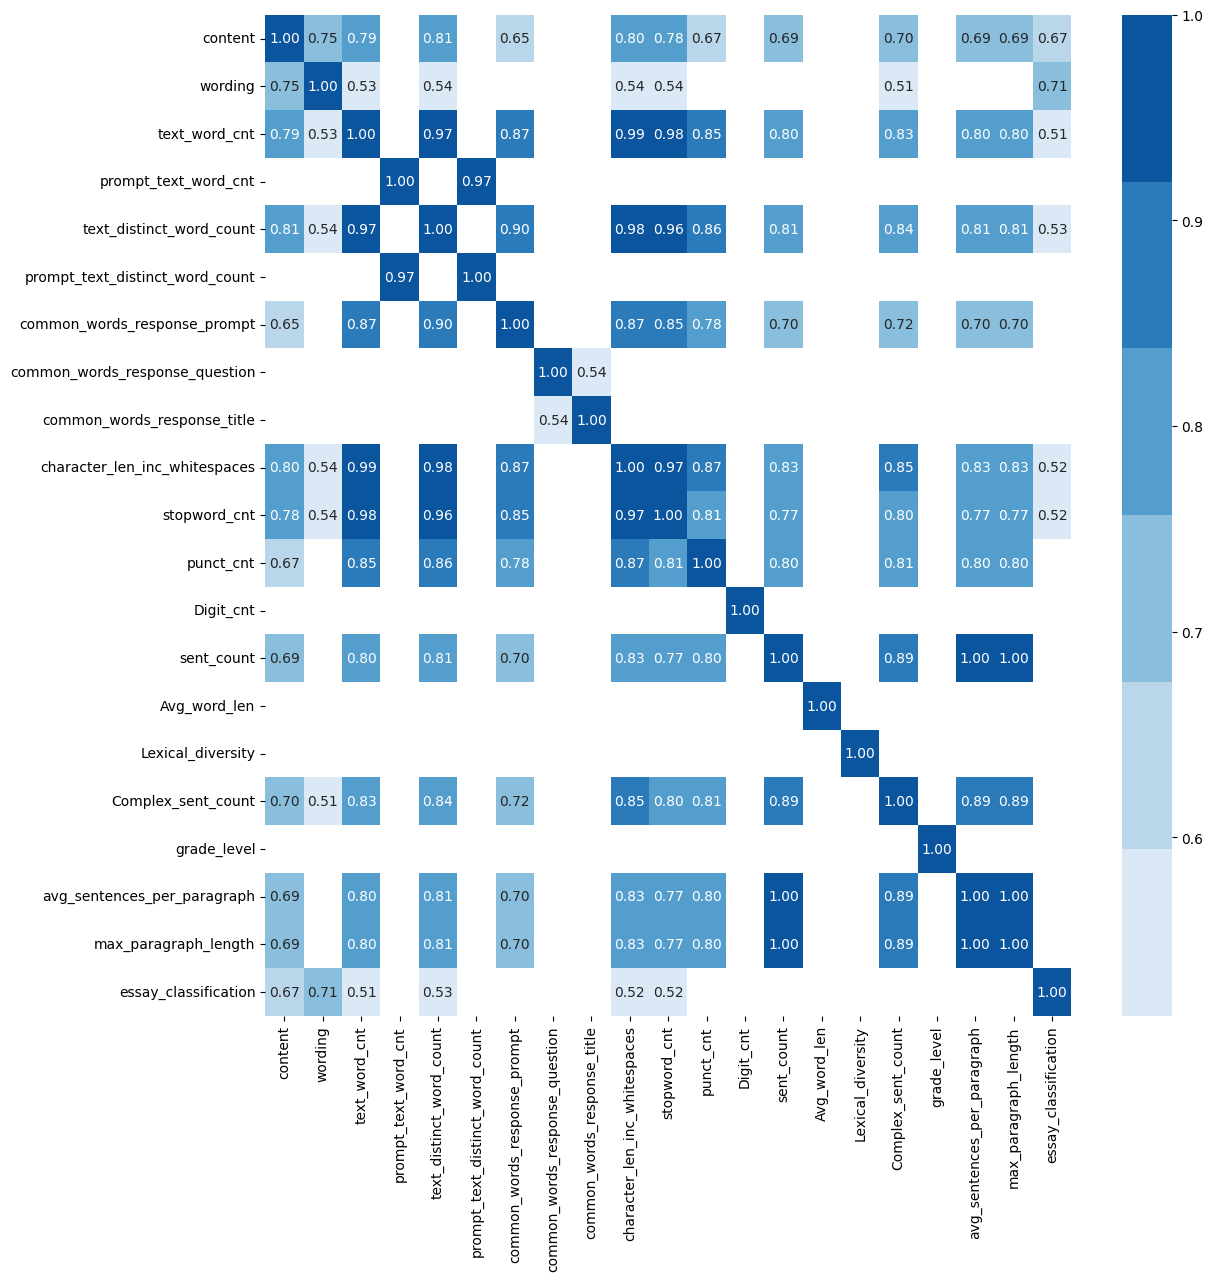

In [40]:

#Using chatgpt

# Calculate the correlation matrix
corr_matrix = df_filter.corr()

# Define the threshold for annotations (0.6 in this case)
threshold = 0.5

# Create a mask to hide annotations for values below the threshold
mask = (corr_matrix <= threshold)

# Create the heatmap with annotations only for values greater than 0.6
plt.figure(figsize=(13, 13))
colormap = sns.color_palette("Blues")
sns.heatmap(corr_matrix, annot=True, cmap=colormap, mask=mask, robust=True, fmt=".2f")

# Show the heatmap
plt.show()








This two Heatmaps show that in preprocessing some of the features were lost like complexity of the sentences with which the students did write the summaries and it also impacted the feature of sentence counts.Denoting that both of those features are related to stopwords.Also apart from them other features varied but not vastly.
A Lot of information regarding the features can be seen in both the cases which is used throughout the code wherever needed
_____________________________________________________________________________________________________________________________________________________

# B - Relationship between number of sentences and different scorings

Text(0.5, 1.0, ' Relationship between number of sentences and Word scoring')

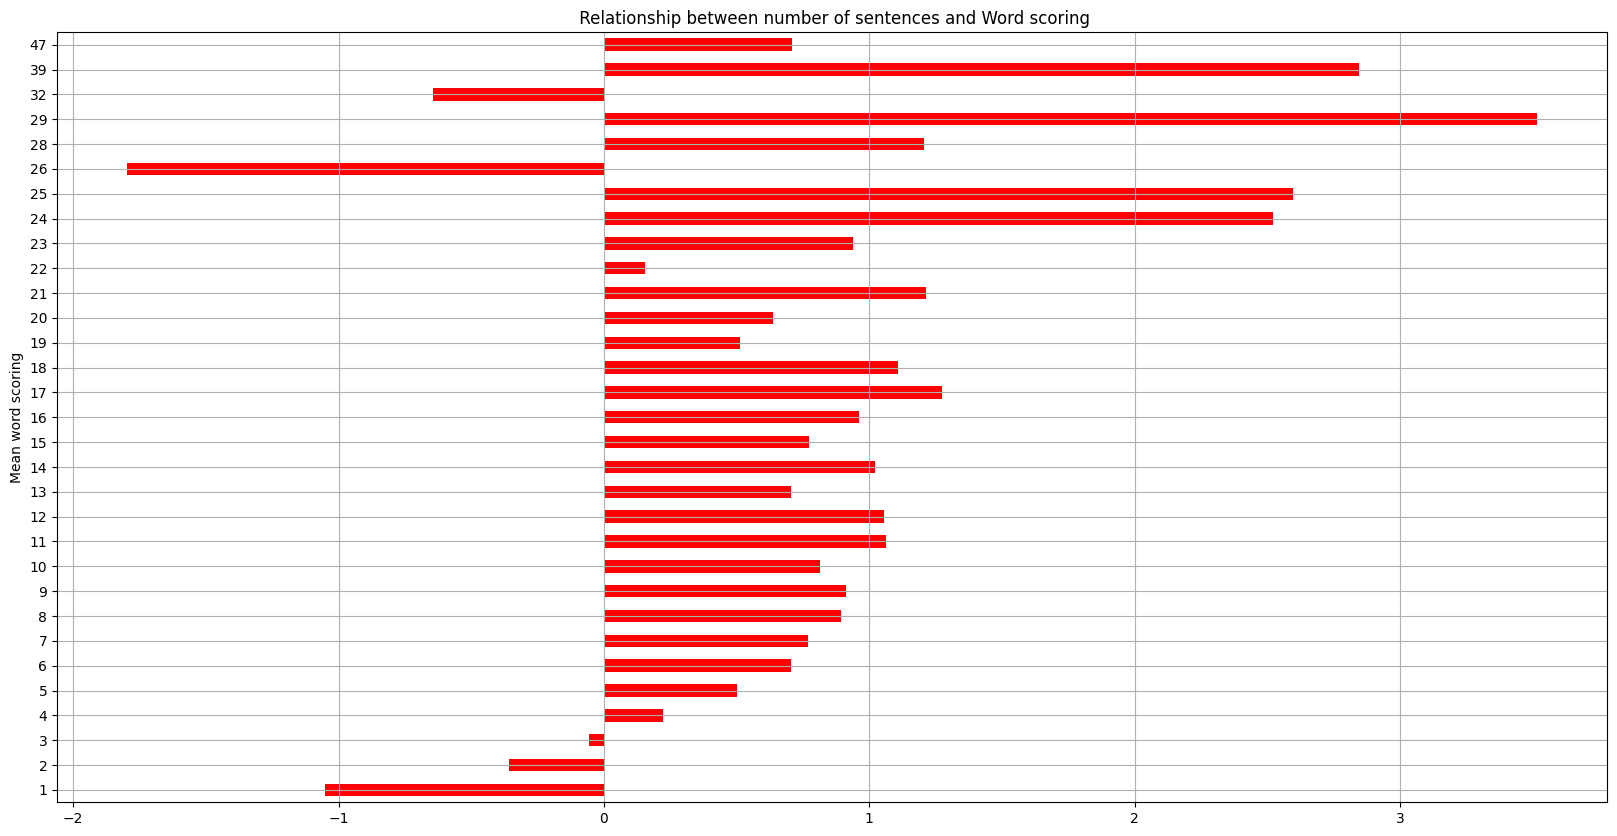

In [41]:
#b

df.head()


Sentvword = df.groupby('sent_count')['wording'].mean()


Sentvword.plot(kind = 'barh', figsize = (20,10), grid=True,color='r')
plt.ylabel('Mean word scoring')
plt.title(' Relationship between number of sentences and Word scoring')




Text(0.5, 1.0, ' Relationship between number of sentences and Content scoring')

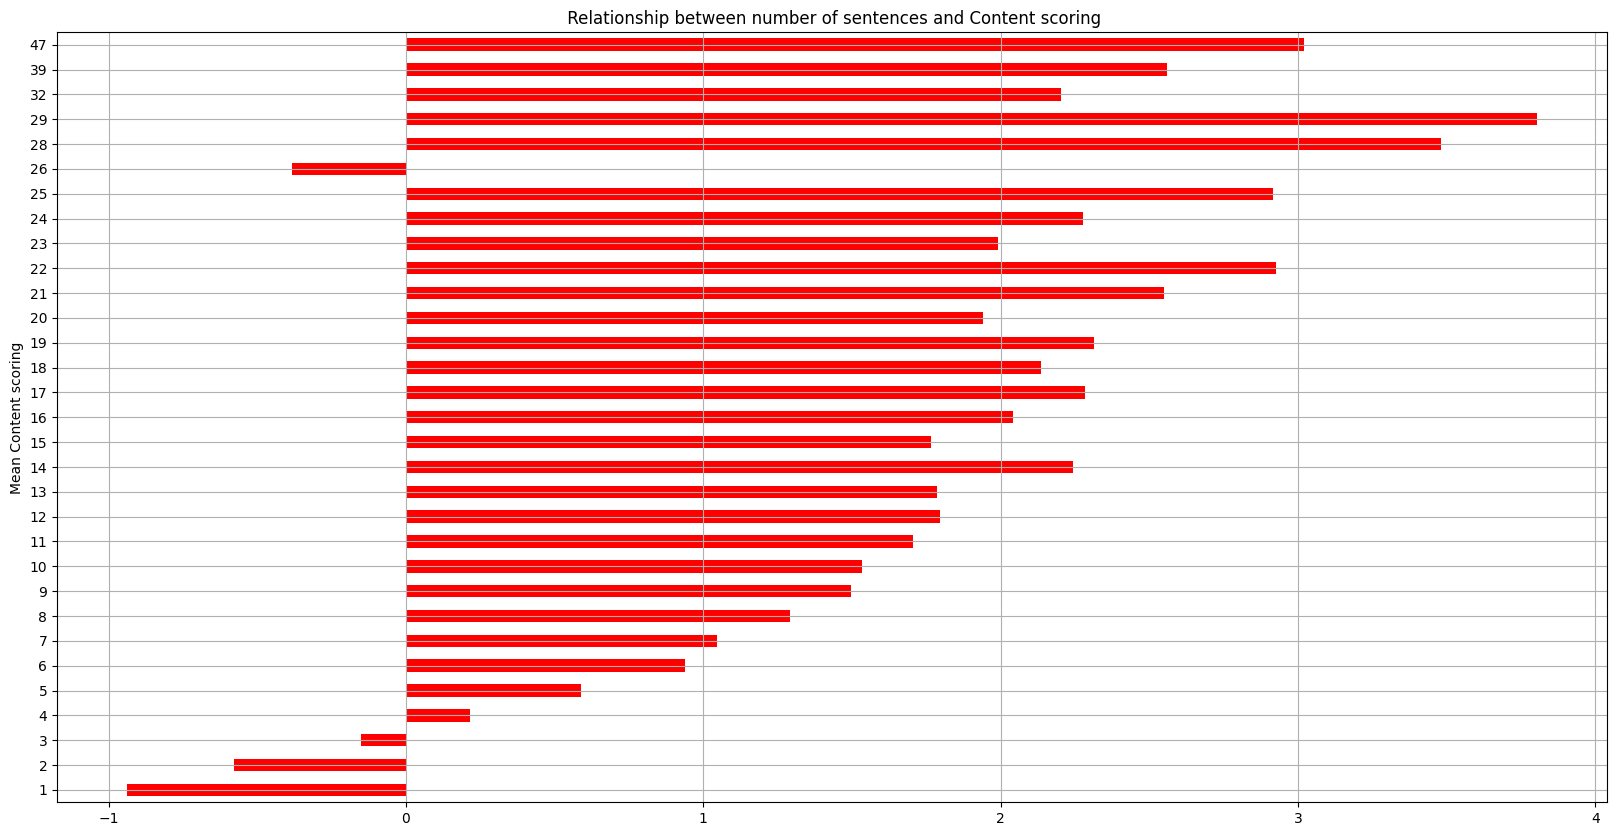

In [42]:

# Content Score V Sentence count
Sentvscore = df.groupby('sent_count')['content'].mean()


Sentvscore.plot(kind = 'barh', figsize = (20,10),grid=True,color='r')
plt.ylabel('Mean Content scoring')
plt.title(' Relationship between number of sentences and Content scoring')




This two graph shows that realtionship between the number of sentences and content is much stronger than wording.This is interesting because
Number of sentences is a numeric attribute and has nothing to do with the content(quality) of the essay However, it is observed that well versed writers 
can write more sentences.

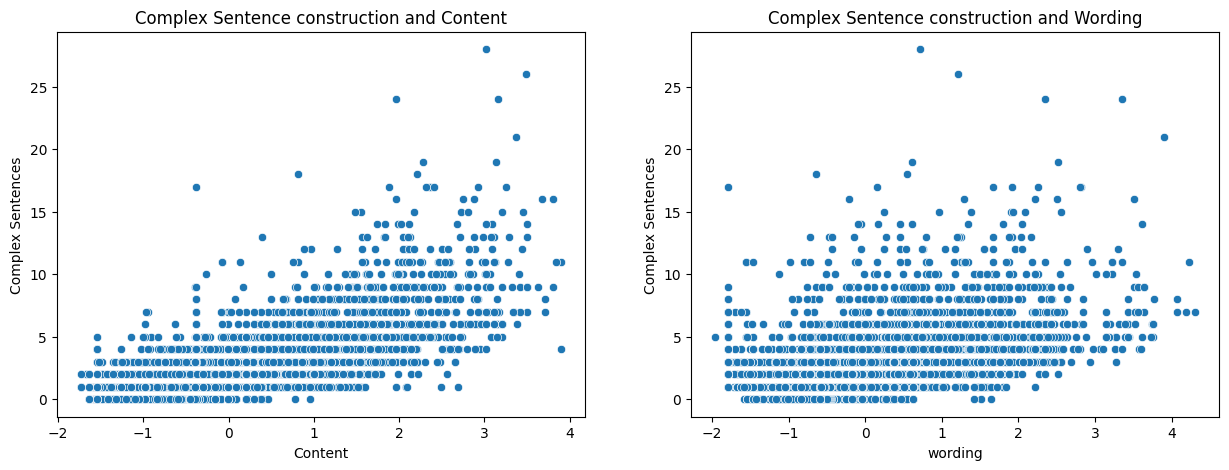

In [43]:
#C

plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.scatterplot(y='Complex_sent_count', x="content", data=df)
plt.title("Complex Sentence construction and Content")
plt.ylabel("Complex Sentences")
plt.xlabel("Content")

plt.subplot(122)
sns.scatterplot(y='Complex_sent_count', x="wording", data=df)
plt.title("Complex Sentence construction and Wording")
plt.ylabel("Complex Sentences")
plt.xlabel("wording")
plt.show()


Most complicated sentences doesnt neccessary have a greater content and wording score. We can find the sweetspot around 5-10 complex sentence range that has good content and good wording score also

________________________________________________________________________________________________________________________________________________

## **Section 6: Baseline Model (Q7, 10 points)**

MODEL 0

In [44]:

# df.info()
# df.count()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features_linear = ['text_word_cnt',
'prompt_text_word_cnt',
'text_distinct_word_count',
'prompt_text_distinct_word_count',
'common_words_response_prompt',
'common_words_response_question',
'common_words_response_title']

y_content = df['content']
y_wording = df['wording']

X_train, X_test, y_content_train, y_content_test  = train_test_split(
    df[features_linear], y_content, test_size=0.2, random_state=4
)

X_train, X_test,y_wording_train, y_wording_test = train_test_split(df[features_linear],y_wording,test_size=0.2,random_state=4) 

content_model = LinearRegression()
wording_model = LinearRegression()

content_model.fit(X_train, y_content_train)
wording_model.fit(X_train, y_wording_train)

content_predictions = content_model.predict(X_test)
wording_predictions = wording_model.predict(X_test)

content_mse = mean_squared_error(y_content_test, content_predictions)
wording_mse = mean_squared_error(y_wording_test, wording_predictions)


print("Content MSE:", content_mse)

print("Wording MSE:", wording_mse)





Content MSE: 0.31074796984618785
Wording MSE: 0.4822350126398979


A lower content MSE shows that the features selected were better for content score prediction than wording score predictions .
_________________________________________________________________________________________________________________________________________

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

Q8.The basic features as defined above are not really suited for the task.  Features can be preprocessed (or cleaned) to improve them before feeding into the model (e.g. normalize them, do a special treatment of missing values, etc). This can significantly improve the performance of your model. Do preprocessing for all the features (the original five plus the extra you add). Explain what you did. (10 points)

Performing normalization by using Z-score so as not to get much affected by outliers 


In [45]:
#Q 8 -------------------------------------------------->

#Z-Score Standardization
from sklearn.preprocessing import StandardScaler


selected_features = df[['content','wording','text_word_cnt','prompt_text_word_cnt',
                        'text_distinct_word_count','prompt_text_distinct_word_count',
                        'common_words_response_prompt','common_words_response_question',
                        'common_words_response_title','character_len_inc_whitespaces',
                        'stopword_cnt','punct_cnt','Digit_cnt','sent_count',
                        'Avg_word_len','Lexical_diversity','Complex_sent_count',
                        'grade_level','avg_sentences_per_paragraph','max_paragraph_length']]

# Create a StandardScaler 
scaler = StandardScaler()

scaled_features = scaler.fit_transform(selected_features)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=selected_features.columns)

# Add the 'essay_classification' column back to the scaled DataFrame
scaled_df['essay_classification'] = df['essay_classification']









PCA to focus on capturing the underlying structure and patterns in the data

In [46]:
# Performing PCA
from sklearn.decomposition import PCA

selected_features_for_pca = scaled_df.drop(columns=['essay_classification','content','wording'])


selected_components = 10  


pca = PCA(n_components=selected_components)

# Fit PCA on the selected features and transform them
pca_output = pca.fit_transform(selected_features_for_pca)

# Create a DataFrame to store the PCA results with column names
pca_columns = [f'PC{i + 1}' for i in range(selected_components)]
pca_df = pd.DataFrame(data=pca_output, columns=pca_columns)

# Add back the 'essay_classification' column to the PCA DataFrame
pca_df['essay_classification'] = scaled_df['essay_classification']
pca_df['content'] = scaled_df['content']
pca_df['wording'] = scaled_df['wording']

In [47]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,essay_classification,content,wording
0,-0.751057,-1.237228,0.231653,-0.702312,-0.271633,-0.159203,0.682550,-0.084864,0.326627,-0.129629,1,0.211343,0.428204
1,9.005032,-1.562593,0.716229,-2.173695,0.958239,1.124524,1.174938,0.705690,1.842464,0.372105,1,3.150702,3.168827
2,-0.700455,-1.198287,0.142182,-0.823803,-0.109096,-0.292973,0.668284,0.125444,-0.528325,0.309068,1,0.211343,0.428204
3,0.035130,-0.884220,1.423733,-0.037387,-0.006176,-0.627464,0.185637,0.028381,-0.174968,0.089178,1,0.558534,0.996292
4,-2.750447,-1.019314,0.097387,-1.179606,-0.140586,0.187806,1.096863,-0.519803,-0.142298,0.169893,0,-0.858406,-0.018048


In [48]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PC1                   7165 non-null   float64
 1   PC2                   7165 non-null   float64
 2   PC3                   7165 non-null   float64
 3   PC4                   7165 non-null   float64
 4   PC5                   7165 non-null   float64
 5   PC6                   7165 non-null   float64
 6   PC7                   7165 non-null   float64
 7   PC8                   7165 non-null   float64
 8   PC9                   7165 non-null   float64
 9   PC10                  7165 non-null   float64
 10  essay_classification  7165 non-null   int64  
 11  content               7165 non-null   float64
 12  wording               7165 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 727.8 KB


MODEL 1


In [49]:
features_model1 = pca_df[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','essay_classification']]

y_content = pca_df['content']
y_wording = pca_df['wording']

X_train, X_test, y_content_train, y_content_test  = train_test_split(
    features_model1, y_content, test_size=0.2, random_state=9
)

X_train, X_test,y_wording_train, y_wording_test = train_test_split(features_model1,y_wording,test_size=0.2,random_state=9) 

#Linear Regression model using the cleaned features
 
content_model = LinearRegression()
wording_model = LinearRegression()

content_model.fit(X_train, y_content_train)
wording_model.fit(X_train, y_wording_train)

content_predictions = content_model.predict(X_test)
wording_predictions = wording_model.predict(X_test)

content_mse_reg = mean_squared_error(y_content_test, content_predictions)
wording_mse_reg = mean_squared_error(y_wording_test, wording_predictions)


print("Content MSE:", content_mse_reg)

print("Wording MSE:", wording_mse_reg)

Content MSE: 0.2798852309528652
Wording MSE: 0.37562206077769583


MODEL 2

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest regressor models for both content and wording
content_rf_model = RandomForestRegressor(n_estimators=60, random_state=68) #any number of n_estimators i.e Trees in random after this value are going to return the same mse
wording_rf_model = RandomForestRegressor(n_estimators=60, random_state=68)

# Fit the models on the training data
content_rf_model.fit(X_train, y_content_train)
wording_rf_model.fit(X_train, y_wording_train)

# Make predictions on the testing data
content_rf_predictions = content_rf_model.predict(X_test)
wording_rf_predictions = wording_rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for both content and wording models
content_rf_mse = mean_squared_error(y_content_test, content_rf_predictions)
wording_rf_mse = mean_squared_error(y_wording_test, wording_rf_predictions)

# Print the MSE for both models
print("Content Random Forest MSE:", content_rf_mse)
print("Wording Random Forest MSE:", wording_rf_mse)


Content Random Forest MSE: 0.21137719632640792
Wording Random Forest MSE: 0.30729210691069525


In [51]:
from sklearn.neighbors import KNeighborsRegressor

# Create k-NN regressor models for both content and wording
content_knn_model = KNeighborsRegressor(n_neighbors=250)  #optimum number of neighbours after trial and error
wording_knn_model = KNeighborsRegressor(n_neighbors=250)

content_knn_model.fit(X_train, y_content_train)
wording_knn_model.fit(X_train, y_wording_train)

content_knn_predictions = content_knn_model.predict(X_test)
wording_knn_predictions = wording_knn_model.predict(X_test)

content_knn_mse = mean_squared_error(y_content_test, content_knn_predictions)
wording_knn_mse = mean_squared_error(y_wording_test, wording_knn_predictions)

print("Content k-NN MSE:", content_knn_mse)
print("Wording k-NN MSE:", wording_knn_mse)


Content k-NN MSE: 0.28253190719249033
Wording k-NN MSE: 0.48364314918171125


In [52]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create SVR models for content and wording separately
content_svr = SVR(kernel='rbf')  
wording_svr = SVR(kernel='rbf')  

content_svr.fit(X_train, y_content_train)
wording_svr.fit(X_train, y_wording_train)

content_predictions = content_svr.predict(X_test)
wording_predictions = wording_svr.predict(X_test)

content_svr_mse = mean_squared_error(y_content_test, content_predictions)
wording_svr_mse = mean_squared_error(y_wording_test, wording_predictions)

print("Content MSE:", content_svr_mse)
print("Wording MSE:", wording_svr_mse)


Content MSE: 0.21567225783472885
Wording MSE: 0.3005648546448369


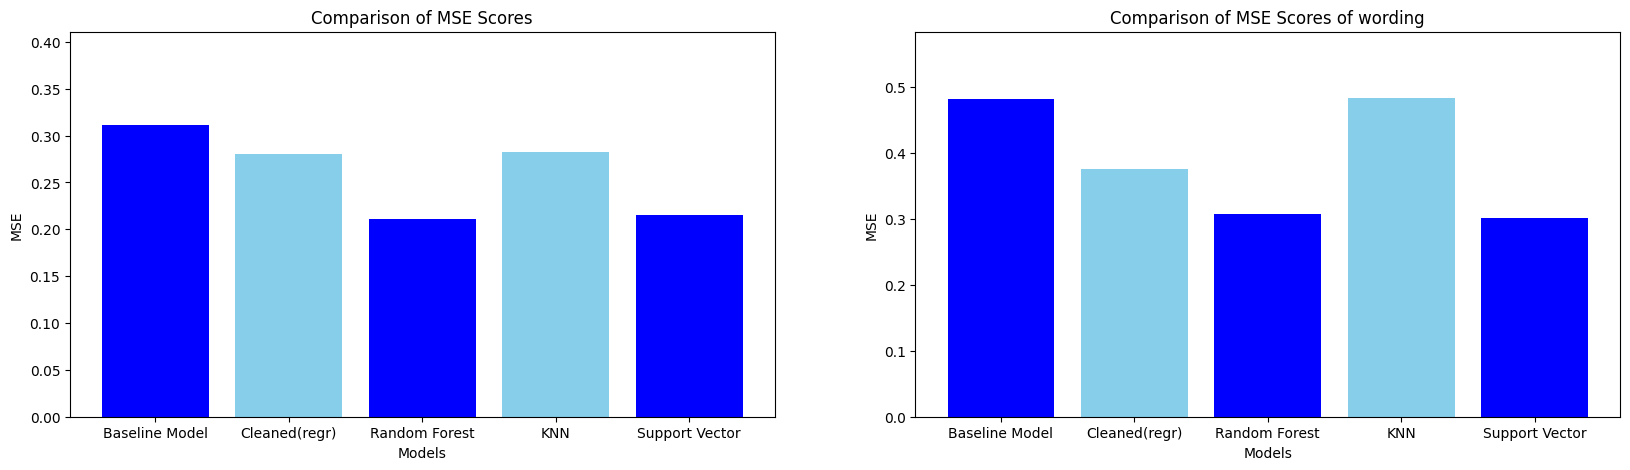

In [53]:
# Model names
model_names = ['Baseline Model','Cleaned(regr)', 'Random Forest','KNN','Support Vector']

# MSE values
mse_values_content = [content_mse,content_mse_reg, content_rf_mse,content_knn_mse,content_svr_mse]
mse_values_wording = [wording_mse,wording_mse_reg, wording_rf_mse,wording_knn_mse,wording_svr_mse]
# Create a bar plot to compare MSE scores
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.bar(model_names, mse_values_content, color=['blue', 'skyblue'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE Scores')
plt.ylim(0, max(mse_values_content) + 0.1)  



plt.subplot(122)
plt.bar(model_names, mse_values_wording, color=['blue', 'skyblue'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE Scores of wording')
plt.ylim(0, max(mse_values_wording) + 0.1)  
plt.show()

The difference between the Baseline model and the Cleaned model is significant denoting the importance of feature selection and cleaning.With more appropriate features and further analysis and cleaning will definitely aid in securing lower scores altogether.

Apart from that due to the lack of good supporting features for wording the MSE is greater in all the models . Mostly the performance of all the models seems similar when there MSE are compared.


# The Random Forest model has the lowest MSE and is the best-performing model among the options.It is an ensemble method and it usually helps capture the underlying complex relationship

_________________________________________________________________________________________________________________________________________________________

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

! This section is optional and Skipped !

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):